# Armlist



We have worked with K2 on an updated contract and moving forward they will be cleaning, deduplicating and sharing data with us on a quarterly basis. As of July 2020, we have data from January 2019 through June 2020.

Since all files are huge and it can't be opened in the Excel file, I will open it using Python for Data Cleaning.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import itertools
import collections

import nltk
from nltk.corpus import stopwords

import networkx

import re, string

pd.set_option('display.max_columns', 500)

In [2]:
q1_2019 = pd.read_csv("Quarterly Files/2019Q1.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 45044: expected 82 fields, saw 93\n'
b'Skipping line 267975: expected 82 fields, saw 93\n'
b'Skipping line 336121: expected 82 fields, saw 93\n'
b'Skipping line 504972: expected 82 fields, saw 93\n'
b'Skipping line 739790: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## An error occurring during load up the file.
While I was opening up the folder, some rows have multiple separators (|) issues. For example, we want 82 columns, so each row should have 82 separators yet, these rows have more than 82 separators, so the computer could not recognize it as a row. This error is present in all data files, but these rows are less than 6 per file (q1 2019 files has over 800,000 rows).  Therefore, I decided to eliminate these errored rows.

In [3]:
q1_2019.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.308228,35.200436,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.837914,39.819489,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0,0,1,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
2,555690,NaN,9153770,2019-01-05,For Sale: Smith and Wesson 1917 revolver - 19...,Handguns,Revolver,Dauphin,"Mechanicsburg, Harrisburg, Pennsylvania",Double / Single Action,Smith & Wesson,45 ACP,2015-12-24,650.0,Private Party,Old workhorse of a revolver. Shoots great with...,Harrisburg,Pennsylvania,PA,40.264587,-76.869644,40.967995,-77.609558,40.264587,-76.869644,2019-01-05 16:02:49.607000000,http://www.armslist.com/posts/9153770,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
3,395218,NaN,8809152,2019-01-05,For Sale: M44,Rifles,Rifle,Maricopa,"Scottsdale, Phoenix, Arizona",NaN,NaN,NaN,2018-07-30,350.0,Private Party,This is a Hungarian mosin nagant m44 built in ...,Scottsdale,Arizona,AZ,33.524143,-111.874240,34.162819,-111.919330,33.524143,-111.874240,2019-01-05 16:02:51.140000000,http://www.armslist.com/posts/8809152,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
4,510392,NaN,9067737,2019-01-05,For Sale: Savage springfield 12,Shotguns,Shotgun,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Savage Arms,12 Gauge,2012-10-19,325.0,Private Party,Semi auto functions perfect older gun 6

In [4]:
q1_2019.tail()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
821544,1529307,NaN,9493765,2019-01-30,For Sale: Smith & Wesson 19-7 .357mag with a ...,Handguns,Pistol,Wyandotte,"Linn Valley, Kansas City, Kansas",Single Action,Smith & Wesson,357 Magnum,2019-01-30,530.0,Private Party,"SHIPPING 3rd day delivery PAYMENTmoney Oder,vi...",Kansas City,Kansas,KS,39.136353,-94.615982,38.498856,-98.325623,39.136353,-94.615982,2020-02-03 00:14:01.307000000,http://www.armslist.com/posts/9493765,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
821545,1634003,NaN,9493792,2019-01-30,For Sale: Montana Rifle 1999 ALR-SS,Rifles,Rifle,Undetermined,"Missouri, Missouri, United States",NaN,NaN,300 Winchester Magnum,2019-01-21,1000.0,Private Party,New in Box (NIB) Montana Rifle Company Model 1...,Missouri,Missouri,MO,NaN,NaN,38.310318,-92.421555,38.310318,-92.421555,2020-02-03 00:14:02.780000000,http://www.armslist.com/posts/9493792,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,1
821546,1457874,NaN,9493806,2019-01-30,For Sale: custom AR,Rifles,Rifle,Richland,"Irmo, Columbia, South Carolina",NaN,NaN,223/5.56 NATO,2019-01-30,800.0,Private Party,"cmc trigger, odin works upper, boron bolt and ...",Columbia,South Carolina,SC,33.987453,-81.024864,33.639748,-80.855362,33.987453,-81.024864,2020-02-03 00:14:04.300000000,http://www.armslist.com/posts/9493806,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,1
821547,1567040,NaN,9493867,2019-01-30,For Sale: RUGER SUPER BLACKHAWK - 44 MAGNUM,Handguns,Revolver,Taylor,"rib lake, Northern WI, Wisconsin",Single Action,Ruger,44 Magnum,2011-06-08,1250.0,Private Party,RUGER SUPER BLACKHAWK in 44 magnum. N.I.B. yes...,rib lake,Wisconsin,WI,45.208012,-90.168991,44.676918,-89.864044,45.208012,-90.168991,2020-02-03 00:14:07.023000000,http://www.armslist.com/posts/9493867,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
821548,1675790,NaN,9493878,2019-01-30,For Sale: savage model 10 fsp-sr,Rifles,Rifle,Allen,"North East, Fort Wayne, Indiana",Bolt Action,Savage Arms,308 Winchester,2013-11-11,1000.0,Private Party,Gun has less than 

In [5]:
q1_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821549 entries, 0 to 821548
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uid                          821549 non-null  int64  
 1   store_id                     17799 non-null   float64
 2   post_id                      821549 non-null  int64  
 3   listed_date                  821549 non-null  object 
 4   title                        821549 non-null  object 
 5   category                     821549 non-null  object 
 6   firearm_type                 821549 non-null  object 
 7   County                       820732 non-null  object 
 8   location                     821549 non-null  object 
 9   action                       518347 non-null  object 
 10  manufacturer                 517174 non-null  object 
 11  caliber                      542343 non-null  object 
 12  registered_date              712441 non-null  object 
 13 

In [6]:
q1_2019.columns

Index(['uid', 'store_id', 'post_id', 'listed_date', 'title', 'category',
       'firearm_type', 'County', 'location', 'action', 'manufacturer',
       'caliber', 'registered_date', 'price_num', 'sale_type', 'post_content',
       'City', 'State', 'State_id', 'city_lat', 'city_lng', 'state_lat',
       'state_lng', 'final_lat', 'final_lng', 'extract_date', 'post_url',
       'firearm_accessories', 'sale_buy', 'uid_Change', 'store_id_Change',
       'category_Change', 'firearm_type_Change', 'action_Change',
       'manufacturer_Change', 'caliber_Change', 'registered_date_Change',
       'sale_type_Change', 'listed_date_Change', 'location_Change',
       'price_num_Change', 'post_content_Change', 'title_Change',
       'Model_Title_Cnt', 'Model_Content_Cnt', 'Feature_Title_Cnt',
       'Feature_Content_Cnt', 'Exclude_Title_Cnt', 'Exclude_Content_Cnt',
       'Model_Title', 'Model_Content', 'Feature_Title', 'Feature_Content',
       'Exclude_Title', 'Exclude_Content', 'action_exclusion',
 

## Column filter out
On June 4 th, Kelly asked me to clean these files with below columns only. 

Field | Field Source | Description
-- | -- | --
uid | K2 | Distinct User Id   developed by K2 through review of collection of other items for sale by the   same seller.
store_id | ArmsList | ID number assigned by   Armslist to dealers registered on the website.
post_id | ArmsList | Armslist Post ID   number contained in posting URL.
listed_date | ArmsList | Content of   "Listed on" field of Post.
category | K2/Armslist | Content of Category   field of Post; when not available, derived if possible by K2 from   firearm_type field.
firearm_type | ArmsList | Content of Firearm   Type field of Post.
County | K2 | County of Post   derived by K2 by parsing the location field.    Approximate.
action | ArmsList | Content of Action   field of Post.
manufacturer | ArmsList | Content of   Manufacturer field of Post.
caliber | ArmsList | Content of Caliber   field of Post.
price_num | K2 | Content of Price   field of Post.
sale_type | ArmsList | Content of Seller   Type field of Post.
post_content | ArmsList | Content of Post body field.
City | K2 | City of Post derived   by K2 by parsing the location field. Approximate.
State | K2 | State of Post derived   by K2 by parsing the location field.
State_id | K2 | State ISO derived by   K2 by parsing the location field.
final_lat | K2 | City latitude derived   by K2 if available, otherwise state latitude derived by K2.
final_lng | K2 | City longitude   derived by K2 if available, otherwise state longitude derived by K2.
firearm_accessories | ArmsList | Content of the   firearm_type field for Categories of Firearm or Accessory.
sale_buy | K2/Armslist | Field is derived from   the Title section of the Post.  Ex.   'For Sale/Trade:'
UniquePostIdFlag | K2 | Indicates   if the post is the "Master" post (1 = Yes, 0 = No)
RecordCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of records in the dataset for a given post id.
DupeRemoveFlag | K2 | This   field has been replaced by the dup_filter_group field.
uid_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "uid" , in the dataset, for a given post   id.
store_id_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "store_id" , in the dataset, for a given   post id.
listed_date_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "listed_date" , in the dataset, for a   given post id.
title_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "title" , in the dataset, for a given post   id.
category_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "category" , in the dataset, for a given post id.
firearm_type_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "firearm_type" , in the dataset, for a given post   id.
location_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "location" , in the dataset, for a given post id.
action_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "action" , in the dataset, for a given post id.
manufacturer_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "manufacturer" , in the dataset, for a given post   id.
caliber_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "caliber" , in the dataset, for a given post id.
registered_date_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "registered_date" , in the dataset, for a given post   id.
price_num_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "price_num" , in the dataset, for a given post id.
sale_type_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "sale_type" , in the dataset, for a given post id.
post_content_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "post_content" , in the dataset, for a given post   id.



In [7]:
q2_2019 = pd.read_csv("Quarterly Files/2019Q2.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 252446: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
q3_2019 = pd.read_csv("Quarterly Files/2019Q3.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 20936: expected 82 fields, saw 93\n'
b'Skipping line 110321: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,29,30,31,32,33,34,35,36,37,38,39,40,41,42,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
q4_2019 = pd.read_csv("Quarterly Files/2019Q4.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 321425: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,21,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,46,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
q1_2020 = pd.read_csv("Quarterly Files/2020Q1.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)


b'Skipping line 269296: expected 82 fields, saw 93\n'
b'Skipping line 482533: expected 82 fields, saw 93\n'
b'Skipping line 643254: expected 82 fields, saw 93\n'


In [11]:
april_2020 = pd.read_csv("Quarterly Files/2020_April.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)


b'Skipping line 93760: expected 82 fields, saw 93\n'


In [12]:
May_June_2020 = pd.read_csv("Quarterly Files/20200501_thru_20200630.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 387924: expected 82 fields, saw 93\n'
b'Skipping line 400810: expected 82 fields, saw 93\n'


In [13]:
frames = [q1_2019, q2_2019, q3_2019, q4_2019, q1_2020, april_2020, May_June_2020]

In [14]:
final_df = pd.concat(frames, ignore_index=True)

# final_df.to_csv('armslist_Jan_2019_to_June_2020.csv', index=False)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723676 entries, 0 to 4723675
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uid                          float64
 1   store_id                     float64
 2   post_id                      int64  
 3   listed_date                  object 
 4   title                        object 
 5   category                     object 
 6   firearm_type                 object 
 7   County                       object 
 8   location                     object 
 9   action                       object 
 10  manufacturer                 object 
 11  caliber                      object 
 12  registered_date              object 
 13  price_num                    float64
 14  sale_type                    object 
 15  post_content                 object 
 16  City                         object 
 17  State                        object 
 18  State_id                     object 
 19  

# Checking for Duplicate rows

1. I will check up duplicated rows using 'duplicated' function of python.
2. Check post ID duplicated. Post ID is Armslist Post ID number contained in posting URL.

In [16]:
# function for finding duplicate rows

def dup(df):
    return df[df.duplicated()]

In [17]:
dup(final_df)

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process


###  No duplicated rows in here if I checked whether it has identical values for all columns.



In [18]:
# Checking how many dup
final_df['DupeRemoveFlag'].value_counts()

0.0    1761830
1.0     163716
Name: DupeRemoveFlag, dtype: int64

### Post ID is Armslist Post ID number contained in posting URL. So, it should be a unique identifier for each post. 
So, I will check duplicated case of Post ID.

After I checked duplicated post ID rows in final_df, 


In [19]:

# panda post id check the number of post_id duplicated rows

len(final_df[final_df['post_id'].duplicated()])

2814679

In [20]:
final_df[final_df['post_id']==9368637]



,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
30,973142.0,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Nightsite...",Denver,Colorado,CO,39.726303,-104.857,38.9956,-105.5471,39.726303,-104.85681,2019-01-05 16:10:19.613000000,http://www.armslist.com/posts/9368637,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
109,973142.0,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Nightsite...",Denver,Colorado,CO,39.726303,-104.857,38.9956,-105.5471,39.726303,-104.85681,2019-01-05 16:25:14.913000000,http://www.armslist.com/posts/9368637,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,K2,0.0


In [21]:
#final_df[final_df['post_id']==9368637].to_csv("post_id_sample1.csv")

In [22]:
final_df[final_df['post_id']==9264932]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
71428,1990.0,NaN,9264932,2019-01-13,For Sale: Smith and Wesson 29-10 Display,Handguns,Revolver,York,"Dillsburg, York, Pennsylvania",Double / Single Action,Smith & Wesson,44 Magnum,2015-12-24,1100.0,Private Party,"Dirty Harry Special! This revolver has a 6.5"" ...",Dillsburg,Pennsylvania,PA,40.091217,-76.9778,40.968,-77.609558,40.091217,-76.977837,2019-01-13 09:46:37.307000000,http://www.armslist.com/posts/9264932,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
138912,1990.0,NaN,9264932,2019-01-20,For Sale: Smith and Wesson 29-10 Display,Handguns,Revolver,York,"Dillsburg, York, Pennsylvania",Double / Single Action,Smith & Wesson,44 Magnum,2015-12-24,1100.0,Private Party,"Dirty Harry Special! This revolver has a 6.5"" ...",Dillsburg,Pennsylvania,PA,40.091217,-76.9778,40.968,-77.609558,40.091217,-76.977837,2019-01-20 10:03:45.080000000,http://www.armslist.com/posts/9264932,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
409426,1990.0,NaN,9264932,2019-02-18,For Sale: Smith and Wesson 29-10 Display,Handguns,Revolver,York,"Dillsburg, York, Pennsylvania",Double / Single Action,Smith & Wesson,44 Magnum,2015-12-24,1100.0,Private Party,"Dirty Harry Special! This revolver has a 6.5"" ...",Dillsburg,Pennsylvania,PA,40.091217,-76.9778,40.968,-77.609558,40.091217,-76.977837,2019-02-18 11:55:46.607000000,http://www.armslist.com/posts/9264932,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
473121,1990.0,NaN,9264932,2019-02-25,For Sale: Smith and Wesson 29-10 Display,Handguns,Revolver,York,"Dillsburg, York, Pennsylvania",Double / Single Action,Smith & Wesson,44 Magnum,2015-12-24,1100.0,Private Party,"Dirty Harry Special! This revolver has a 6.5"" ...",Dillsburg,Pennsylvania,PA,40.091217,-76.9778,40.968,-77.609558,40.091217,-76.977837,2019-02-25 10:51:53.903000000,http://www.armslist.com/posts/9264932,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
551545,1990.0,NaN,9264932,2019-03-06,For

In [23]:


#final_df[final_df['post_id']==9264932].to_csv("post_id_sample2.csv")

In [24]:
final_df[final_df['post_id']==11911433]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
4723312,1958979.0,NaN,11911433,2020-06-05,For Sale: Ruger LCP II .380 Package,Handguns,Pistol,Mohave,"Bullhead City, Mohave Valley, Arizona",Double Action,Ruger,380 ACP,2017-07-21,300.0,Private Party,Ruger .380 LCP II in excellent condition with ...,Bullhead City,Arizona,AZ,35.171497,-114.539,34.1628,-111.91933,35.171497,-114.5386,2020-06-05 18:18:00.977,http://www.armslist.com/posts/11911433,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,NaN,0.0
4723313,1958979.0,NaN,11911433,2020-06-05,For Sale: Ruger LCP II .380 Package,Handguns,Pistol,Mohave,"Bullhead City, Mohave Valley, Arizona",Double Action,Ruger,380 ACP,2017-07-21,300.0,Private Party,Ruger .380 LCP II in excellent condition with ...,Bullhead City,Arizona,AZ,35.171497,-114.539,34.1628,-111.91933,35.171497,-114.5386,2020-06-05 16:53:47.657,http://www.armslist.com/posts/11911433,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.111111e+13,NaN,0.0


In [25]:
final_df[final_df.duplicated(subset=['post_id','listed_date'])]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
56,945364.0,NaN,9368682,2019-01-05,For Trade: 500 Mossberg persuader,Shotguns,Shotgun,Essex,"Peabody, Massachusetts, United States",Pump Action,Mossberg,12 Gauge,2016-09-01,NaN,Private Party,Brand new Mossberg 500 Persuader with tactical...,Peabody,Massachusetts,MA,42.536995,-70.9736,42.0605,-71.686592,42.536995,-70.973648,2019-01-05 16:10:36.030000000,http://www.armslist.com/posts/9368682,Firearms,For Trade,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
106,1024648.0,NaN,9368737,2019-01-05,For Sale: Savage 110FCP,Rifles,Rifle,Hamilton,"Hamilton, Cincinnati, Ohio",Bolt Action,Savage Arms,338 Lapua,2018-02-27,2000.0,Premium Vendor,Savage 110FCP 338 Lupua with Vortex Viper gen1...,Cincinnati,Ohio,OH,39.166759,-84.5382,40.1774,-82.672379,39.166759,-84.538223,2019-01-05 16:25:12.303000000,http://www.armslist.com/posts/9368737,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,K2,0.0
107,944687.0,NaN,9368662,2019-01-05,For Sale: nightforce BR scope,Optics,Parts & Accessories,Allen,"South, Lima, Ohio",NaN,NaN,NaN,2011-12-04,1100.0,Private Party,"Nightforce 12-42x56 scope np-r2 reticle, like ...",Lima,Ohio,OH,40.772148,-84.0471,40.1774,-82.672379,40.772148,-84.047096,2019-01-05 16:25:12.867000000,http://www.armslist.com/posts/9368662,Accessories,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,K2,0.0
108,1130340.0,NaN,9368723,2019-01-05,For Sale: Spyderco Police Knife,Knives,Non-Firearm Weapons,Maricopa,"Tempe, Phoenix, Arizona",NaN,NaN,NaN,2018-02-06,100.0,Private Party,Spyderco Police knife straight edge. Got it fo...,Tempe,Arizona,AZ,33.401394,-111.931,34.1628,-111.919330,33.401394,-111.931300,2019-01-05 16:25:13.570000000,http://www.armslist.com/posts/9368723,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,K2,0.0
109,973142.0,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Night

# Checking for deduplicated posts

We discussed about how we can check deduplicated posts from K2's original posts. <BR>

Kelly is interested to see what's happening in 2019. Kelly wants to know,<BR>
how many deduplicated posts there are for each of the methods K2 mentioned. So it would be:

1. In 2019, how many deduplicated posts there were by only keeping if UniquePostIdFlag == 1
2. In 2019, how many deduplicated posts there were by only looking at dup_filter_group == Etown
3. In 2019, how many deduplicated posts there were by only looking at dup_filter_group == K2

In [26]:
# First - Data just for 2019

frames_2019 = [q1_2019, q2_2019, q3_2019, q4_2019]

# concat 2019 data into one df.

df_2019 = pd.concat(frames_2019, ignore_index=True)

In [27]:
df_2019.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
2,555690,NaN,9153770,2019-01-05,For Sale: Smith and Wesson 1917 revolver - 19...,Handguns,Revolver,Dauphin,"Mechanicsburg, Harrisburg, Pennsylvania",Double / Single Action,Smith & Wesson,45 ACP,2015-12-24,650.0,Private Party,Old workhorse of a revolver. Shoots great with...,Harrisburg,Pennsylvania,PA,40.264587,-76.8696,40.968,-77.609558,40.264587,-76.869644,2019-01-05 16:02:49.607000000,http://www.armslist.com/posts/9153770,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
3,395218,NaN,8809152,2019-01-05,For Sale: M44,Rifles,Rifle,Maricopa,"Scottsdale, Phoenix, Arizona",NaN,NaN,NaN,2018-07-30,350.0,Private Party,This is a Hungarian mosin nagant m44 built in ...,Scottsdale,Arizona,AZ,33.524143,-111.874,34.1628,-111.919330,33.524143,-111.874240,2019-01-05 16:02:51.140000000,http://www.armslist.com/posts/8809152,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
4,510392,NaN,9067737,2019-01-05,For Sale: Savage springfield 12,Shotguns,Shotgun,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Savage Arms,12 Gauge,2012-10-19,325.0,Private Party,Semi auto fun

In [28]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064385 entries, 0 to 3064384
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uid                          int64  
 1   store_id                     float64
 2   post_id                      int64  
 3   listed_date                  object 
 4   title                        object 
 5   category                     object 
 6   firearm_type                 object 
 7   County                       object 
 8   location                     object 
 9   action                       object 
 10  manufacturer                 object 
 11  caliber                      object 
 12  registered_date              object 
 13  price_num                    float64
 14  sale_type                    object 
 15  post_content                 object 
 16  City                         object 
 17  State                        object 
 18  State_id                     object 
 19  

### Case 1:  UniquePostIdFlag == 1

For each case, I will check how many categories in the variable that we use condition.<br>
Then, I will use post_id and listed date for deduplicated. So, if these two variables are same, I will count as deduplicated case

final_df[final_df.duplicated(subset=['post_id','listed_date'])]

In [29]:
df_2019['UniquePostIdFlag'].value_counts()

1.0    1128429
Name: UniquePostIdFlag, dtype: int64

From 3,064,384 post, UniquePostIdFlag == 1 is 1,129,429. 

In [30]:
df_2019_case1 = df_2019[df_2019['UniquePostIdFlag']==1]

In [31]:
df_2019_case1.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
5,602052,NaN,9368645,2019-01-05,For Sale/Trade: H &R 733,Handguns,Revolver,Davidson,"Hendersonville, Nashville, Tennessee",Double / Single Action,H&R,32 S&W,NaN,250.0,Private Party,H&R model 733 up for sale or trade its a 6 sho...,Nashville,Tennessee,TN,36.165688,-86.7781,35.8105,-85.924271,36.165688,-86.778099,2019-01-05 16:02:52.640000000,http://www.armslist.com/posts/9368645,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
9,102115,NaN,9341741,2019-01-05,For Sale: Lnib S&W 1911ta e series,Handguns,Handguns,Hillsborough,"St pete, Tampa/St. Pete, Florida",NaN,NaN,NaN,2015-05-19,795.0,Private Party,Flawless with crimson trace $795,Tampa,Florida,FL,27.996098,-82.582,27.7716,-83.772789,27.996098,-82.582031,2019-01-05 16:02:55.500000000,http://www.armslist.com/posts/9341741,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
12,587215,NaN,9336964,2019-01-05,For Sale: Pre-2016 Enforcement Notice KAC AR15,Rifles,Rifle,Bristol,"Rehoboth, Massachusetts, United States",Semi-Automatic,Yankee Hill Machine,223/5.56 NATO,2018-12-08,2000.0,Private Party,Complete Knight's Armament SR15 E3 upper recei...,Rehoboth,Massachusetts,MA,41.852989,-71.2431,42.0605,-71.686592,41.852989,-71.243057,2019-01-05 16:02:56.983000000,http://www.armslist.com/posts/9336964,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,1.0,NaN,1,NaN,NaN,AR15,SR15,NaN,pistol /2 grip,NaN,NaN,N,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
14,467555,NaN,9368618,2019-01-05,For Sale/Trade: Windham AR-15,Rifles,Rifle,Undetermined,"South Shore, Massachusetts, United States",Semi-Automatic,Windham Weaponry,223 Wylde,2017-05-04,0.0,Private 

In [32]:
df_2019_case1[df_2019_case1.duplicated(subset=['post_id','listed_date'])]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process


In [33]:
# panda post id check the number of post_id duplicated rows

df_2019_case1[df_2019_case1['post_id'].duplicated()]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
1632934,60,700.0,4357808,2019-07-09,For Sale: GEISSELE SUPER SABRA TRIGGER FOR TH...,Gun Parts,Parts & Accessories,Marion,"salem, Salem, Oregon",NaN,NaN,NaN,2013-11-05,350.0,Premium Vendor,Description:Type: 2 Stage1st Stage Weight: 3...,salem,Oregon,OR,44.984467,-122.457,44.0971,-120.67402,44.984467,-122.45702,2019-07-09 01:23:43.903000000,http://www.armslist.com/posts/6745065,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,K2,0.0
2875567,3510,NaN,7478331,2019-12-07,For Sale: Sig P220,Handguns,Pistol,Undetermined,"SE Metro Area, Colorado, United States",Double / Single Action,Sig Sauer,45 ACP,2013-10-03,575.0,Private Party,Sig P220 .45 acp. Good condition. Some finish ...,Boise,Idaho,ID,43.603767,-116.273,45.5027,-114.04269,43.603767,-116.27292,2019-12-07 19:49:11.260000000,http://www.armslist.com/posts/10856260,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,NaN,NaN,NaN,NaN,AR10,NaN,NaN,NaN,NaN,NaN,N,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0


In [34]:
df_2019_case1[df_2019_case1['post_id']==4357808]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
613181,60,700.0,4357808,2019-03-13,For Sale: GEISSELE SUPER SABRA TRIGGER FOR TH...,Gun Parts,Parts & Accessories,Marion,"salem, Salem, Oregon",NaN,NaN,NaN,2013-11-05,350.0,Premium Vendor,Description:Type: 2 Stage1st Stage Weight: 3...,www.blackrifledepot.com,New Hampshire,NH,NaN,NaN,43.8928,-71.601318,43.892845,-71.601318,2019-03-13 04:28:55.920000000,http://www.armslist.com/posts/9556014,Accessories,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,K2,0.0
1632934,60,700.0,4357808,2019-07-09,For Sale: GEISSELE SUPER SABRA TRIGGER FOR TH...,Gun Parts,Parts & Accessories,Marion,"salem, Salem, Oregon",NaN,NaN,NaN,2013-11-05,350.0,Premium Vendor,Description:Type: 2 Stage1st Stage Weight: 3...,salem,Oregon,OR,44.984467,-122.457,44.0971,-120.674020,44.984467,-122.457020,2019-07-09 01:23:43.903000000,http://www.armslist.com/posts/6745065,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,K2,0.0


In [35]:
df_2019_case1[df_2019_case1['post_id']==7478331]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
2693278,3510,NaN,7478331,2019-11-12,For Sale: Sig P220,Handguns,Pistol,Undetermined,"SE Metro Area, Colorado, United States",Double / Single Action,Sig Sauer,45 ACP,2013-10-03,575.0,Private Party,Sig P220 .45 acp. Good condition. Some finish ...,Oklahoma City,Oklahoma,OK,35.491608,-97.5628,35.3692,-98.722466,35.491608,-97.56282,2019-11-12 17:46:11.953000000,http://www.armslist.com/posts/10739221,Firearms,Want to Buy,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
2875567,3510,NaN,7478331,2019-12-07,For Sale: Sig P220,Handguns,Pistol,Undetermined,"SE Metro Area, Colorado, United States",Double / Single Action,Sig Sauer,45 ACP,2013-10-03,575.0,Private Party,Sig P220 .45 acp. Good condition. Some finish ...,Boise,Idaho,ID,43.603767,-116.273,45.5027,-114.042690,43.603767,-116.27292,2019-12-07 19:49:11.260000000,http://www.armslist.com/posts/10856260,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,NaN,NaN,NaN,NaN,AR10,NaN,NaN,NaN,NaN,NaN,N,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0


In [36]:

# want to find out duplicated in post_id columns
len(df_2019_case1['post_id'])-len(df_2019_case1['post_id'].drop_duplicates())

2

2 rows are droped when I checked post_id duplciates

## Case 1 Summary

1. There are little over 1.1 million posts with UniquePostIdFlag == 1.
2. When I check the rows that have deduplicated post id and post date, there are no deduplicated rows.
3. When I check the rows that have deduplicated post id, there are 2 deduplicated rows. So, we can keep most of the data.

## Case 2: dup_filter_group == Etown

Same step
1. value count to check how many rows I filter
2. filter the condition
3. check deduplicate case

In [37]:
df_2019['dup_filter_group'].value_counts()

K2       1486528
ETown        463
Name: dup_filter_group, dtype: int64

## There are only 463 rows with dup_filter_group ==ETown. 
SO, I decided not to test this condition.

## Case 3: dup_filter_group == K2

Same step
1. value count to check how many rows I filter
2. filter the condition
3. check deduplicate case


<br>
I already know that there are 1,486,528 rows of K2.

In [38]:
# Filter the dataset

df_2019_case3 = df_2019[df_2019['dup_filter_group']=='K2']

In [39]:
df_2019_case3[df_2019_case3.duplicated(subset=['post_id','listed_date'])]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
4845,940381,NaN,9344667,2019-01-06,For Sale: RUGER PC 9mm,Rifles,Rifle,Oklahoma,"Edmond, Oklahoma City, Oklahoma",Semi-Automatic,Ruger,9mm Luger (9x19),2013-09-30,479.0,Premium Vendor,"Ruger, Pistol Caliber Carbine, Semi-automatic,...",Edmond,Oklahoma,OK,35.674778,-97.4997,35.3692,-98.722466,35.674778,-97.499680,2019-01-06 03:54:35,http://www.armslist.com/posts/9344667,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K2,0.0
4867,592799,NaN,9253521,2019-01-06,For Sale: AR 6.8,Rifles,Rifle,Greene,"Conway, Springfield, Missouri",Semi-Automatic,Anderson Manufacturing,6.8mm SPCII,2018-10-26,750.0,Private Party,6.8 AR with Burris scope.$700 firm. Will sell ...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2019-01-06 04:18:20.757000000,http://www.armslist.com/posts/9253521,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,mount,NaN,NaN,N,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K2,0.0
4885,536725,NaN,8967786,2019-01-06,For Sale: New Smith and Wesson m&p 15-22,Rifles,Rifle,Washington,"Gentry, Fayetteville, Arkansas",Semi-Automatic,Smith & Wesson,22 Long Rifle,2014-06-15,1500.0,Private Party,"New Smith and Wesson M&P 15-22, New Nikon 3-9x...",Fayetteville,Arkansas,AR,35.974602,-94.191,34.7555,-92.171539,35.974602,-94.190994,2019-01-06 04:26:40.537000000,http://www.armslist.com/posts/8967786,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K2,0.0
4886,592631,NaN,9246821,2019-01-06,For Sale: Sig p320 VTAC 9mm,Handguns,Pistol,Tarrant,"Fort Worth, Texas, United States",Striker Fire,Sig Sauer,9mm Luger (9x19),2016-01-09,650.0,Private Party,Got a NIB Sig P320 VTAC edition. Has not been ...,Fort Worth,Texas,TX,32.771420,-97.2915,31.2003,-100.105090,32.771420,-97.291481,2019-01-06 04:26:41.210000000,http://www.armslist.com/posts/9246821,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K2,0.0
4903,606752,NaN,9266127,2019-01-06,For Sale: Romanian AK-47,Rifles,Rifle,Madison,"Athens, Huntsville, Alabama",Semi-Automatic,NaN,7.62x39,2018-09-11,650.0,Private Party,Romanian made

In [40]:
df_2019_case3.duplicated(subset=['post_id','listed_date'], keep='first').sum()

93362

There are 93,362  rows that have duplicated post_id and post_date

In [41]:
df_2019_case3.duplicated(subset='post_id', keep='first').sum()

1020066

There are 1,020,066 duplicated rows with post_id.

## Case 3 Summary

1. There are around 1.5 million posts with 'dup_filter_group'=='K2'.
2. When I check the rows that have duplicated post id and post date, there are 93,362 deduplicated rows.
3. When I check the rows that have duplicated post id, there are 1,020,066 deduplicated rows. So, we lose most of the data.

## Anjali's comment

Anjali mentioned that she removed rows where duperemoveflag= 1.

So, I will check how many are there.


In [42]:
# Duperemoveflag value count- there are more rows that these two values, so remaining will be NaN.

df_2019['DupeRemoveFlag'].value_counts()

0.0    1020185
1.0     108244
Name: DupeRemoveFlag, dtype: int64

In [43]:
# Total 2019 data rows
len(df_2019)

3064385

In [44]:
# Check how many rows are not DupeRemoveFlag != 1
len(df_2019[df_2019['DupeRemoveFlag']!=1])

2956141

In [45]:
df_2019_case4 = df_2019[df_2019['DupeRemoveFlag']!=1]

In [46]:
df_2019_case4.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
2,555690,NaN,9153770,2019-01-05,For Sale: Smith and Wesson 1917 revolver - 19...,Handguns,Revolver,Dauphin,"Mechanicsburg, Harrisburg, Pennsylvania",Double / Single Action,Smith & Wesson,45 ACP,2015-12-24,650.0,Private Party,Old workhorse of a revolver. Shoots great with...,Harrisburg,Pennsylvania,PA,40.264587,-76.8696,40.968,-77.609558,40.264587,-76.869644,2019-01-05 16:02:49.607000000,http://www.armslist.com/posts/9153770,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
3,395218,NaN,8809152,2019-01-05,For Sale: M44,Rifles,Rifle,Maricopa,"Scottsdale, Phoenix, Arizona",NaN,NaN,NaN,2018-07-30,350.0,Private Party,This is a Hungarian mosin nagant m44 built in ...,Scottsdale,Arizona,AZ,33.524143,-111.874,34.1628,-111.919330,33.524143,-111.874240,2019-01-05 16:02:51.140000000,http://www.armslist.com/posts/8809152,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
4,510392,NaN,9067737,2019-01-05,For Sale: Savage springfield 12,Shotguns,Shotgun,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Savage Arms,12 Gauge,2012-10-19,325.0,Private Party,Semi auto fun

# Check the differences between DupeRemoveFlag and UniquePostIdFlag


In [47]:
df_2019[df_2019['DupeRemoveFlag']==1]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
108,1130340,NaN,9368723,2019-01-05,For Sale: Spyderco Police Knife,Knives,Non-Firearm Weapons,Maricopa,"Tempe, Phoenix, Arizona",NaN,NaN,NaN,2018-02-06,100.0,Private Party,Spyderco Police knife straight edge. Got it fo...,Tempe,Arizona,AZ,33.401394,-111.931,34.1628,-111.919330,33.401394,-111.931300,2019-01-05 16:25:13.570000000,http://www.armslist.com/posts/9368723,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K2,0.0
109,973142,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Nightsite...",Denver,Colorado,CO,39.726303,-104.857,38.9956,-105.547100,39.726303,-104.856810,2019-01-05 16:25:14.913000000,http://www.armslist.com/posts/9368637,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K2,0.0
110,1269705,NaN,9368565,2019-01-05,For Sale: Smith rubin,Antique Firearms,Antique Firearms,Lenawee,"Tipton, Michigan, United States",NaN,NaN,NaN,NaN,300.0,Private Party,Smith Rubin with scope,Tipton,Michigan,MI,42.021721,-84.065,44.5941,-86.297958,42.021721,-84.064972,2019-01-05 16:25:15.913000000,http://www.armslist.com/posts/9368565,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K2,0.0
111,1171582,NaN,9368729,2019-01-05,For Sale: M1A SOCOM 16,Rifles,Rifle,Norfolk (city),"Norfolk, Hampton Roads, Virginia",Semi-Automatic,Springfield,308/7.62 NATO,2014-01-31,2500.0,Private Party,"This 308 is in well above average condition, a...",Norfolk,Virginia,VA,NaN,NaN,37.9263,-79.436584,37.926323,-79.436584,2019-01-05 16:25:16.740000000,http://www.armslist.com/posts/9368729,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,mount,NaN,NaN,N,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K2,0.0
113,950987,NaN,9368536,2019-01-05,For Sale: XD 9//4 INCH//NIGHT SIGHTS,Handguns,Pistol,Undetermined,"Nc, Georgia, United States",NaN,Springfield,NaN,2018-12-01,360.0,Private Party,For Sale XD 9 Service 4 inch Springfield with ...,Nc,Georgia,GA,NaN,NaN,32.7543,-83.188370,32.7543

### Check some posts from dupremoveflag

In [48]:
df_2019[df_2019['post_id']==9368723]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
29,1130340,NaN,9368723,2019-01-05,For Sale: Spyderco Police Knife,Knives,Non-Firearm Weapons,Maricopa,"Tempe, Phoenix, Arizona",NaN,NaN,NaN,2018-02-06,100.0,Private Party,Spyderco Police knife straight edge. Got it fo...,Tempe,Arizona,AZ,33.401394,-111.931,34.1628,-111.91933,33.401394,-111.9313,2019-01-05 16:10:19.147000000,http://www.armslist.com/posts/9368723,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
108,1130340,NaN,9368723,2019-01-05,For Sale: Spyderco Police Knife,Knives,Non-Firearm Weapons,Maricopa,"Tempe, Phoenix, Arizona",NaN,NaN,NaN,2018-02-06,100.0,Private Party,Spyderco Police knife straight edge. Got it fo...,Tempe,Arizona,AZ,33.401394,-111.931,34.1628,-111.91933,33.401394,-111.9313,2019-01-05 16:25:13.570000000,http://www.armslist.com/posts/9368723,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,K2,0.0


In [49]:
df_2019[df_2019['post_id']==9368637]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
30,973142,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Nightsite...",Denver,Colorado,CO,39.726303,-104.857,38.9956,-105.5471,39.726303,-104.85681,2019-01-05 16:10:19.613000000,http://www.armslist.com/posts/9368637,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
109,973142,NaN,9368637,2019-01-05,For Sale: Glock 17 Gen 5,Handguns,Pistol,Denver,"Arvada, Denver, Colorado",Semi-Automatic,Glock,9mm Luger (9x19),2019-01-05,550.0,Private Party,"Pre-Owned, Glock 17 G5 with Ameriglo Nightsite...",Denver,Colorado,CO,39.726303,-104.857,38.9956,-105.5471,39.726303,-104.85681,2019-01-05 16:25:14.913000000,http://www.armslist.com/posts/9368637,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,K2,0.0


In [50]:
df_2019[df_2019['post_id']==10089345]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
1395873,1307857,NaN,10089345,2019-06-13,For Sale: Trijicon VCOG 1-6x24 Riflescope Gre...,Optics,Parts & Accessories,Undetermined,"TX, Texas, United States",NaN,NaN,NaN,NaN,1500.0,Private Party,Selling a like new Trijicon VCOG 1-6x24 Rifle ...,TX,Texas,TX,NaN,NaN,31.2003,-100.10509,31.200333,-100.10509,2019-06-13 09:49:54.937000000,http://www.armslist.com/posts/10089345,Accessories,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
1441535,1307857,NaN,10089345,2019-06-18,For Sale: Trijicon VCOG 1-6x24 Riflescope Gre...,Optics,Parts & Accessories,Undetermined,"TX, Texas, United States",NaN,NaN,NaN,NaN,1500.0,Private Party,Selling a like new Trijicon VCOG 1-6x24 Rifle ...,TX,Texas,TX,NaN,NaN,31.2003,-100.10509,31.200333,-100.10509,2019-06-18 15:37:35.573000000,http://www.armslist.com/posts/10089345,Accessories,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
1495793,1307857,NaN,10089345,2019-06-25,For Sale: Trijicon VCOG 1-6x24 Riflescope Gre...,Optics,Parts & Accessories,Undetermined,"TX, Texas, United States",NaN,NaN,NaN,NaN,1500.0,Private Party,Selling a like new Trijicon VCOG 1-6x24 Rifle ...,TX,Texas,TX,NaN,NaN,31.2003,-100.10509,31.200333,-100.10509,2019-06-25 00:33:45.333000000,http://www.armslist.com/posts/10089345,Accessories,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
1585166,1307857,NaN,10089345,2019-07-03,For Sale: Trijicon VCOG 1-6x24 Riflescope Gre...,Optics,Parts & Accessories,Undetermined,"TX, Texas, United States",NaN,NaN,NaN,NaN,1500.0,Private Party,Selling a like new Trijicon VCOG 1-6x24 Rifle ...,TX,Texas,TX,NaN,NaN,31.2003,-100.10509,31.200333,-100.10509,2019-07-03 10:01:03.593000000,http://www.armslist.com/posts/10089345,Accessories,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
1715268,1307857,NaN,10089345,2019-07-18,For Sale: Trijicon VCOG 1-6x24 Riflescope Gre...,Optics,Parts & Accessories,Undetermined,"TX, Texas, United States",NaN,NaN,NaN,NaN,1500.0,Private Party,Selling a like new Trijicon VC

In [51]:
#df_2019[df_2019['post_id']==9368637].to_csv("DupeRemoveFlag_sample.csv")

# df_2019[df_2019['post_id']==10089345].to_csv("DupeRemoveFlag_sample2.csv")

In [52]:
df_2019[df_2019['post_id']==9219754]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
61410,510392,NaN,9219754,2019-01-12,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-12 09:38:47.007000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
110300,510392,NaN,9219754,2019-01-17,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-17 10:51:24.607000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
170807,510392,NaN,9219754,2019-01-23,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-23 18:51:46.827000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0
263813,510392,NaN,9219754,2019-02-02,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,P

In [53]:
df_2019_case4[df_2019_case4.duplicated(subset=['post_id','listed_date'])]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
56,945364,NaN,9368682,2019-01-05,For Trade: 500 Mossberg persuader,Shotguns,Shotgun,Essex,"Peabody, Massachusetts, United States",Pump Action,Mossberg,12 Gauge,2016-09-01,NaN,Private Party,Brand new Mossberg 500 Persuader with tactical...,Peabody,Massachusetts,MA,42.536995,-70.9736,42.0605,-71.686592,42.536995,-70.973648,2019-01-05 16:10:36.030000000,http://www.armslist.com/posts/9368682,Firearms,For Trade,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
106,1024648,NaN,9368737,2019-01-05,For Sale: Savage 110FCP,Rifles,Rifle,Hamilton,"Hamilton, Cincinnati, Ohio",Bolt Action,Savage Arms,338 Lapua,2018-02-27,2000.0,Premium Vendor,Savage 110FCP 338 Lupua with Vortex Viper gen1...,Cincinnati,Ohio,OH,39.166759,-84.5382,40.1774,-82.672379,39.166759,-84.538223,2019-01-05 16:25:12.303000000,http://www.armslist.com/posts/9368737,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,K2,0.0
107,944687,NaN,9368662,2019-01-05,For Sale: nightforce BR scope,Optics,Parts & Accessories,Allen,"South, Lima, Ohio",NaN,NaN,NaN,2011-12-04,1100.0,Private Party,"Nightforce 12-42x56 scope np-r2 reticle, like ...",Lima,Ohio,OH,40.772148,-84.0471,40.1774,-82.672379,40.772148,-84.047096,2019-01-05 16:25:12.867000000,http://www.armslist.com/posts/9368662,Accessories,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,K2,0.0
112,1079196,NaN,9368686,2019-01-05,For Sale: Smith & Wesson M&P9 9mm FDE with Box,Handguns,Pistol,Cuyahoga,"ashtabula, Cleveland, Ohio",NaN,Smith & Wesson,9mm Luger (9x19),2018-10-25,400.0,Premium Vendor,Nice Pre-owned Smith & Wesson M&P9 in FDE with...,Cleveland,Ohio,OH,41.685745,-81.6728,40.1774,-82.672379,41.685745,-81.672798,2019-01-05 16:25:18.797000000,http://www.armslist.com/posts/9368686,Firearms,For Sale,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,K2,0.0
115,1079637,NaN,9368698,2019-01-05,For Sale: Mossberg 20 ga. 2 3/4 & 3 â,Shotguns,Shotgun,Marshall,"Boaz, Alabama, United States",Pump Action,Mossberg,20 Gauge,2018-01-03,225.0,Premium Vendor,Mossbe

In [54]:
df_2019_case4.duplicated(subset='post_id', keep='first').sum()

1749401

## Case 4 Summary

1. There are around 2.96 million posts with 'DupeRemoveFlag'!=1'.
2. When I check the rows that have duplicated post id and post date, there are 162,234 deduplicated rows.
3. When I check the rows that have duplicated post id, there are 1,749,401 deduplicated rows. So, we lose most of the data.

I will keep duperemoveflag!=1 option for another analysis.

# Analysis

## Past Analysis: Total ADs for Firearm

The 2018 analysis found out the total number of gun posts and their types. 
![Screen Shot 2020-07-20 at 9 27 41 AM](https://user-images.githubusercontent.com/30204645/87943244-bf6b1980-ca6b-11ea-90f1-799596f39b07.png)

For this, I will use 2019 and 2020 data separately and find out the number of post and its type.




In [55]:
# pulling out deduplicated rows
dedup_final_df_upf = final_df[final_df['UniquePostIdFlag']==1]

dedup_final_df_drf = final_df[final_df['DupeRemoveFlag']!=1]

In [56]:
# pulling out with csv

#dedup_final_df.to_csv('Armslist_dedup.csv', index=False)

In [57]:
dedup_final_df_upf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925546 entries, 1 to 4723675
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   uid                          float64
 1   store_id                     float64
 2   post_id                      int64  
 3   listed_date                  object 
 4   title                        object 
 5   category                     object 
 6   firearm_type                 object 
 7   County                       object 
 8   location                     object 
 9   action                       object 
 10  manufacturer                 object 
 11  caliber                      object 
 12  registered_date              object 
 13  price_num                    float64
 14  sale_type                    object 
 15  post_content                 object 
 16  City                         object 
 17  State                        object 
 18  State_id                     object 
 19  

In [58]:
# divide 2019 and 2020 cases

# 2019 DF
dedup_df_2019_upf = df_2019_case1

dedup_df_2019_drf = df_2019_case4

# 2020 DF
frames_2020 = [q1_2020, april_2020, May_June_2020]

df_2020 = pd.concat(frames_2020, ignore_index=True)

# implementing case #1
dedup_df_2020_upf = df_2020[df_2020['UniquePostIdFlag']==1]


# implementing case # 4

dedup_df_2020_drf = df_2020[df_2020['DupeRemoveFlag']!=1]

## Vetting 2019 and 2020 data before filtered deduped rows

In [59]:

# Number of dataset
len(df_2019)

3064385

In [60]:
len(df_2020)

1659291

In [61]:
# Total Want to Sell ("WTS") posts, all categories
len(df_2019[df_2019['sale_buy']=='For Sale'])

2872462

In [62]:
len(df_2020[df_2020['sale_buy']=='For Sale'])

1531153

In [63]:
# pulling out with csv

#dedup_df_2019.to_csv('Armslist_dedup_2019.csv', index=False)

#dedup_df_2020.to_csv('Armslist_dedup_2020.csv', index=False)

## Assault weapon
There are two fields that give category info in the armslist data: firearm_type and category. <BR>
Firearm_type comes directly from the Armslist post and is more granular, while category is a grouping of firearm_type. K2 created two fields called model_title_cnt and model_content_cnt that indicate whether the ad title or ad content contained any of the assault weapon keywords that we defined.

To assign assault weapons, we set category = 'Assault-style Rifles' for rows where: 
the existing category = 'Rifles' and
either model_title_cnt or model_content_cnt is not null
In other words: category = 'Rifles' AND (model_title_cnt is not null OR model_content_cnt is not null)

In [64]:
dedup_final_df_upf.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
1,590251.0,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
5,602052.0,NaN,9368645,2019-01-05,For Sale/Trade: H &R 733,Handguns,Revolver,Davidson,"Hendersonville, Nashville, Tennessee",Double / Single Action,H&R,32 S&W,NaN,250.0,Private Party,H&R model 733 up for sale or trade its a 6 sho...,Nashville,Tennessee,TN,36.165688,-86.7781,35.8105,-85.924271,36.165688,-86.778099,2019-01-05 16:02:52.640000000,http://www.armslist.com/posts/9368645,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
9,102115.0,NaN,9341741,2019-01-05,For Sale: Lnib S&W 1911ta e series,Handguns,Handguns,Hillsborough,"St pete, Tampa/St. Pete, Florida",NaN,NaN,NaN,2015-05-19,795.0,Private Party,Flawless with crimson trace $795,Tampa,Florida,FL,27.996098,-82.582,27.7716,-83.772789,27.996098,-82.582031,2019-01-05 16:02:55.500000000,http://www.armslist.com/posts/9341741,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
12,587215.0,NaN,9336964,2019-01-05,For Sale: Pre-2016 Enforcement Notice KAC AR15,Rifles,Rifle,Bristol,"Rehoboth, Massachusetts, United States",Semi-Automatic,Yankee Hill Machine,223/5.56 NATO,2018-12-08,2000.0,Private Party,Complete Knight's Armament SR15 E3 upper recei...,Rehoboth,Massachusetts,MA,41.852989,-71.2431,42.0605,-71.686592,41.852989,-71.243057,2019-01-05 16:02:56.983000000,http://www.armslist.com/posts/9336964,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,1.0,NaN,1,NaN,NaN,AR15,SR15,NaN,pistol /2 grip,NaN,NaN,N,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
14,467555.0,NaN,9368618,2019-01-05,For Sale/Trade: Windham AR-15,Rifles,Rifle,Undetermined,"South Shore, Massachusetts, United States",Semi-Automatic,Windham Weaponry,223 Wylde,2017-05-04,0.

In [65]:
dedup_final_df_drf.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392.0,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.3082,35.2004,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
1,590251.0,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
2,555690.0,NaN,9153770,2019-01-05,For Sale: Smith and Wesson 1917 revolver - 19...,Handguns,Revolver,Dauphin,"Mechanicsburg, Harrisburg, Pennsylvania",Double / Single Action,Smith & Wesson,45 ACP,2015-12-24,650.0,Private Party,Old workhorse of a revolver. Shoots great with...,Harrisburg,Pennsylvania,PA,40.264587,-76.8696,40.968,-77.609558,40.264587,-76.869644,2019-01-05 16:02:49.607000000,http://www.armslist.com/posts/9153770,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
3,395218.0,NaN,8809152,2019-01-05,For Sale: M44,Rifles,Rifle,Maricopa,"Scottsdale, Phoenix, Arizona",NaN,NaN,NaN,2018-07-30,350.0,Private Party,This is a Hungarian mosin nagant m44 built in ...,Scottsdale,Arizona,AZ,33.524143,-111.874,34.1628,-111.919330,33.524143,-111.874240,2019-01-05 16:02:51.140000000,http://www.armslist.com/posts/8809152,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0
4,510392.0,NaN,9067737,2019-01-05,For Sale: Savage springfield 12,Shotguns,Shotgun,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Savage Arms,12 Gauge,2012-10-19,325.0,Private Party,Sem

### Categorizing the weapon

First, check category's value count for values that we may have.

In [66]:
dedup_final_df_upf['category'].value_counts()

Handguns                       871207
Rifles                         520656
Shotguns                       121707
Gun Parts                      106347
Ammo                            81047
Optics                          61763
Magazines                       30493
Reloading                       19186
Antique Firearms                18539
Tactical Gear                   15674
Holsters                        13611
Miscellaneous                   11937
Knives                          11333
Archery                          8486
Muzzle Loaders                   8231
NFA Firearms                     4372
Vehicles                         4017
Gun Safes                        3529
Air Guns                         3179
Targets and Range Equipment      2515
Hunting Gear                     2281
Services                         1715
Events                            918
Farming Equipment                 866
Fishing Gear                      841
Paintball/Airsoft                 699
Firearms Tra

After confirmed with Kelly, we decided 3 things.

1. Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.
2. Check Sale_type for Private party gun sale.
3. Like Anjali said before, I will use the following grouping for types of the firearms. <Br>
    a. Handgun - Category = 'Handgun' <br>
    b. Rifle - Category = "Rifle" AND model_title_cnt is null OR model_content_cnt is null) <br>
    c. Shotgun - Category = 'Shotgun'<br>
    d. Assault-style Rifles - category = 'Rifles' AND (model_title_cnt is not null OR model_content_cnt is not null) <Br>

In [67]:
firearm = ['Handguns', 'Rifles', 'Shotguns']
firearm_other = ['Gun Parts', 'Ammo', 'Magazines', 'Reloading', 'Antique Firearms', 'Tactical Gear', 
                 'Holsters',  'Muzzle Loaders', 'NFA Firearms', 'Gun Safes', 'Firearms Training']
non_firearm = ['Optics', 'Miscellaneous', 'Knievs', 'Archery', 'Vehicles', 'Air Guns', 
               'Targets and Range Equipment', 'Hunting Gear', 'Services', 'Events', 'Farming Equipment', 
               'Fishing Gear', 'Paintball/Airsoft', 'All Categories']

In [68]:
#Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.

def cate_group(df):
    if df['category'] in firearm :
        return "Firearm Post"
    elif df['category'] in firearm_other:
        return "Firearm_Other Post"
    else:
        return "Non_Firearm Post"

In [69]:
# For whole data
dedup_final_df_upf['Category_Group'] = dedup_final_df_upf.apply(cate_group, axis=1)

dedup_final_df_drf['Category_Group'] = dedup_final_df_drf.apply(cate_group, axis=1)

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:


dedup_df_2019_upf['Category_Group'] = dedup_df_2019_upf.apply(cate_group, axis=1)

dedup_df_2020_upf['Category_Group'] = dedup_df_2020_upf.apply(cate_group, axis=1)

dedup_df_2019_drf['Category_Group'] = dedup_df_2019_drf.apply(cate_group, axis=1)

dedup_df_2020_drf['Category_Group'] = dedup_df_2020_drf.apply(cate_group, axis=1)

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying 

In [71]:
dedup_df_2019_upf['Category_Group'].value_counts()

Firearm Post          910446
Firearm_Other Post    154024
Non_Firearm Post       63959
Name: Category_Group, dtype: int64

In [72]:
dedup_df_2019_drf['Category_Group'].value_counts()

Firearm Post          2229701
Firearm_Other Post     527582
Non_Firearm Post       198858
Name: Category_Group, dtype: int64

### Firearm Category

Within Firearm Post, we want to determine its types.

a. Handgun - Category = 'Handgun'

b. Rifle - Category = "Rifle" AND model_title_cnt is null AND model_content_cnt is null)

c. Shotgun - Category = 'Shotgun'

d. Assault-style Rifles - category = 'Rifles' AND (model_title_cnt is not null OR model_content_cnt is not null)

I use conditions and choices of Np.select because pd.apply with isnull() keep giving me the error.

https://numpy.org/doc/stable/reference/generated/numpy.select.html

In [73]:
conditions = [
    dedup_final_df_upf['category'].eq('Handguns'),
    dedup_final_df_upf['category'].eq("Rifles")& dedup_final_df_upf['Model_Content_Cnt'].isnull() & \
    dedup_final_df_upf['Model_Title_Cnt'].isnull(),
    dedup_final_df_upf['category'].eq("Shotguns"),
    dedup_final_df_upf['category'].eq("Rifles")& (dedup_final_df_upf['Model_Content_Cnt'].notna() | \
                                             dedup_final_df_upf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_final_df_upf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [75]:
conditions = [
    dedup_final_df_drf['category'].eq('Handguns'),
    dedup_final_df_drf['category'].eq("Rifles")& dedup_final_df_drf['Model_Content_Cnt'].isnull() & \
    dedup_final_df_drf['Model_Title_Cnt'].isnull(),
    dedup_final_df_drf['category'].eq("Shotguns"),
    dedup_final_df_drf['category'].eq("Rifles")& (dedup_final_df_drf['Model_Content_Cnt'].notna() | \
                                             dedup_final_df_drf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_final_df_drf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [76]:
conditions = [
    dedup_df_2019_upf['category'].eq('Handguns'),
    dedup_df_2019_upf['category'].eq("Rifles")& dedup_df_2019_upf['Model_Content_Cnt'].isnull() & \
    dedup_df_2019_upf['Model_Title_Cnt'].isnull(),
    dedup_df_2019_upf['category'].eq("Shotguns"),
    dedup_df_2019_upf['category'].eq("Rifles")& (dedup_df_2019_upf['Model_Content_Cnt'].notna() | \
                                             dedup_df_2019_upf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_df_2019_upf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

conditions = [
    dedup_df_2019_drf['category'].eq('Handguns'),
    dedup_df_2019_drf['category'].eq("Rifles")& dedup_df_2019_drf['Model_Content_Cnt'].isnull() & \
    dedup_df_2019_drf['Model_Title_Cnt'].isnull(),
    dedup_df_2019_drf['category'].eq("Shotguns"),
    dedup_df_2019_drf['category'].eq("Rifles")& (dedup_df_2019_drf['Model_Content_Cnt'].notna() | \
                                             dedup_df_2019_drf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_df_2019_drf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
conditions = [
    dedup_df_2020_upf['category'].eq('Handguns'),
    dedup_df_2020_upf['category'].eq("Rifles")& dedup_df_2020_upf['Model_Content_Cnt'].isnull() & dedup_df_2020_upf['Model_Title_Cnt'].isnull(),
    dedup_df_2020_upf['category'].eq("Shotguns"),
    dedup_df_2020_upf['category'].eq("Rifles")& (dedup_df_2020_upf['Model_Content_Cnt'].notna() | dedup_df_2020_upf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_df_2020_upf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

conditions = [
    dedup_df_2020_drf['category'].eq('Handguns'),
    dedup_df_2020_drf['category'].eq("Rifles")& dedup_df_2020_drf['Model_Content_Cnt'].isnull() & dedup_df_2020_drf['Model_Title_Cnt'].isnull(),
    dedup_df_2020_drf['category'].eq("Shotguns"),
    dedup_df_2020_drf['category'].eq("Rifles")& (dedup_df_2020_drf['Model_Content_Cnt'].notna() | dedup_df_2020_drf['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

dedup_df_2020_drf['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
dedup_df_2019_upf['ET_Firearm_Type'].value_counts()

Handguns                522294
Rifles                  222617
Not_Firearm             217983
Assault-style Rifles     89748
Shotguns                 75787
Name: ET_Firearm_Type, dtype: int64

In [79]:
dedup_df_2019_drf['ET_Firearm_Type'].value_counts()

Handguns                1213195
Not_Firearm              726440
Rifles                   591876
Assault-style Rifles     222713
Shotguns                 201917
Name: ET_Firearm_Type, dtype: int64

# illegal gun sale - without background check

it's going to depend on the state and their law. You'll want to use this google sheet as a reference (https://docs.google.com/spreadsheets/d/1HrSI25SrIMBAyvKYk7Y3yoiCvLsqcxcRuGXUmagUg8o/edit#gid=0) but i'll explain a bit more below.

1. For states where there is no background check law (column B), any firearm post listed by an unlicensed dealer (or private party) does not legally require a background check.

2. For states where there is a background check law (yes in column B) that's NOT highlighted in that pink color then all of the posts by unlicensed sellers do legally require a background check.

3. Then the states I've highlighted in that pink color are a little bit trickier because of new states passing background check laws:<br>

    a. For Nevada, if the post was by an unlicensed seller in either 2018 or 2019 then it did not legally require a check. However, starting January 2020 all posts do require a check <br>
    b. For New Mexico, posts by unlicensed sellers that were posted between January 2018 and June 2019 did not legally require a check. Posts between July 2019 and present do require a check.<br>
    c. For Virginia, posts by unlicensed sellers that were posted between January 2018 and June 2020 did not legally require a check. Posts between July 2020 and present do require a check.<br>
    d. Then for Maryland and Pennsylvania, handguns posted by unlicensed sellers do require a background check. Long guns (i.e. rifles, shotguns, and assault rifles do not.




1. Create a list for 'No' background require states and check whether the state of a row belongs in the list or not
2. create a list of state for 'Yes' without pink.
3. For 2019, Nevada and Virginia will be 'No'.
4. For 2019 July, create a rule for New Mexico. 
5. Create a rule for Maryland and Pennsylvania - Handguns are required, long guns is not. 


In [80]:
no_bg = ['Alabama','Alaska','Arizona','Arkansas','Florida','Georgia','Idaho','Indiana','Kansas','Kentucky',
         'Louisiana','Maine','Minnesota','Mississippi','Missouri','Montana','New Hampshire','North Dakota',
         'Ohio','Oklahoma','South Carolina','South Dakota','Tennessee','Texas','Utah','West Virginia',
         'Wisconsin', 'Wyoming']
yes_bg = ['California', 'Colorado','Connecticut','Delaware','District of Columbia','Hawaii','Illinois','Iowa',
          'Massachusetts','Michigan','Nebraska','New Jersey','New York','North Carolina','Oregon','Rhode Island',
          'Vermont','Washington']
special_state = ['Maryland', 'Nevada','New Mexico','Pennsylvania','Virginia']

In [81]:
# change to datetime
dedup_final_df_upf['listed_date'] = pd.to_datetime(dedup_final_df_upf['listed_date'])
dedup_final_df_drf['listed_date'] = pd.to_datetime(dedup_final_df_drf['listed_date'])

dedup_df_2019_upf['listed_date'] = pd.to_datetime(dedup_df_2019_upf['listed_date'])
dedup_df_2019_drf['listed_date'] = pd.to_datetime(dedup_df_2019_drf['listed_date'])

dedup_df_2020_upf['listed_date'] = pd.to_datetime(dedup_df_2020_upf['listed_date'])
dedup_df_2020_drf['listed_date'] = pd.to_datetime(dedup_df_2020_drf['listed_date'])

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [82]:
dedup_df_2019_upf[(dedup_df_2019_upf['State']=='Maryland') & (dedup_df_2019_upf['category']=='Handguns')]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type
5172,1153068,NaN,9371606,2019-01-06,For Sale: Colt Single Action Army,Handguns,Revolver,Undetermined,"Maryland, Maryland, United States",Single Action,Colt,9mm Luger (9x19),2019-01-06,1400.0,Private Party,Colt 3rd Generation Single Action Army Like Ne...,Maryland,Maryland,MD,NaN,NaN,38.8477,-77.282196,38.847744,-77.282196,2019-01-06 07:30:23.233000000,http://www.armslist.com/posts/9371606,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns
7253,937268,NaN,9338771,2019-01-06,For Sale/Trade: Adams arms 7.5 upper,Handguns,Pistol,Queen Anne's,"Centreville, Maryland, United States",Semi-Automatic,Adams Arms,223/5.56 NATO,2017-07-19,650.0,Private Party,FS/FT - Adams arms 7.5 5.56 pdw upper - inclu...,Centreville,Maryland,MD,NaN,NaN,38.8477,-77.282196,38.847744,-77.282196,2019-01-06 11:31:03.630000000,http://www.armslist.com/posts/9338771,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns
8374,937268,NaN,9372931,2019-01-06,For Sale/Trade: 7.5â Adams arms complete upper,Handguns,Pistol,Queen Anne's,"Centreville, Maryland, United States",Semi-Automatic,Adams Arms,223/5.56 NATO,2017-07-19,550.0,Private Party,UPDATEDFS/FT - Adams arms 7.5 5.56/223 pdw u...,Centreville,Maryland,MD,NaN,NaN,38.8477,-77.282196,38.847744,-77.282196,2019-01-06 13:30:41.230000000,http://www.armslist.com/posts/9372931,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns
12552,1177681,NaN,9375167,2019-01-06,For Sale: Glock 23 Gen4 Trijicon HD Night Sights,Handguns,Pistol,Undetermined,"Eastern shore, Maryland, United States",Striker Fire,Glock,40 S&W,NaN,400.0,Private Party,Glock 23 Gen4 Trijicon HD Sights(3) 13 Round M...,Eastern shore,Maryland,MD,NaN,NaN,38.8477,-77.282196,38.847744,-77.282196,2019-01-06 21:26:05.863000000,http://www.armslist.com/posts/9375167,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns
15092,468575,NaN,8961048,2019-01-07,

In [83]:
dedup_df_2019_upf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128429 entries, 1 to 3064384
Data columns (total 84 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   uid                          1128429 non-null  int64         
 1   store_id                     6881 non-null     float64       
 2   post_id                      1128429 non-null  int64         
 3   listed_date                  1128429 non-null  datetime64[ns]
 4   title                        1128429 non-null  object        
 5   category                     1128429 non-null  object        
 6   firearm_type                 1128429 non-null  object        
 7   County                       1128030 non-null  object        
 8   location                     1128429 non-null  object        
 9   action                       742734 non-null   object        
 10  manufacturer                 746924 non-null   object        
 11  caliber    

In [84]:
#Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.

def legal_check(df):
    # First check it is Firearm post or not
    if (df['Category_Group'] == "Firearm Post") & (df['sale_type'] =='Private Party') :
        # if state is no background check, then it is legal
        if df['State'] in no_bg :
            return "No Background Check Required"
        # if state is required background check, then it is illegal
        elif df['State'] in yes_bg:
            return "Background Check Required"
        elif df['State'] in special_state:
            nv_date  = pd.to_datetime('01-01-2020').date()
            nm_date = pd.to_datetime('07-01-2019').date()
            vi_date = pd.to_datetime('07-01-2020').date()
            if (df['State']=='Nevada') & (df['listed_date']< nv_date):
                return 'No Background Check Required'
            elif (df['State']=='New Mexico') & (df['listed_date']< nm_date):
                return 'No Background Check Required'
            elif (df['State']=='Virginia') & (df['listed_date']< vi_date):
                return 'No Background Check Required'
            elif (df['State']=='Maryland') & (df['ET_Firearm_Type']!='Handguns'):
                return 'No Background Check Required'
            elif (df['State']=='Pennsylvania') & (df['ET_Firearm_Type']!='Handguns'):
                return 'No Background Check Required'
            else:
                return 'Background Check Required'
    elif (df['Category_Group'] == "Firearm Post") & (df['sale_type'] =='Premium Vendor') :
        return 'Background Check Required'
    else:
        return "Not_Firearm_Post"

In [85]:
dedup_final_df_upf['Background_Check']= dedup_final_df_upf.apply(legal_check, axis=1)
dedup_final_df_drf['Background_Check']= dedup_final_df_drf.apply(legal_check, axis=1)


dedup_df_2019_upf['Background_Check'] = dedup_df_2019_upf.apply(legal_check, axis=1)

dedup_df_2019_drf['Background_Check'] = dedup_df_2019_drf.apply(legal_check, axis=1)

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [86]:
dedup_df_2020_upf['Background_Check'] = dedup_df_2020_upf.apply(legal_check, axis=1)

dedup_df_2020_drf['Background_Check'] = dedup_df_2020_drf.apply(legal_check, axis=1)

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:

# Checking
dedup_df_2019_drf[dedup_df_2019_drf['State']=='New Mexico']

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
382,1308995,NaN,9368836,2019-01-05,For Sale: Burris Fastfire 3 [like new],Optics,Parts & Accessories,Bernalillo,"Cottonwood, Albuquerque, New Mexico",NaN,NaN,NaN,2018-10-05,200.0,Private Party,"Hi! Selling my burris fastfire 3 sight, like n...",Albuquerque,New Mexico,NM,35.199593,-106.645,34.2027,-106.04627,35.199593,-106.64483,2019-01-05 16:43:07.137000000,http://www.armslist.com/posts/9368836,Accessories,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Non_Firearm Post,Not_Firearm,Not_Firearm_Post
446,1325064,NaN,9368942,2019-01-05,For Sale: Cmmg AR conversion kit,Gun Parts,Parts & Accessories,Bernalillo,"RIO RANCHO, Albuquerque, New Mexico",NaN,NaN,NaN,NaN,180.0,Private Party,I have a new unified un used cmmg conversion k...,Albuquerque,New Mexico,NM,35.199593,-106.645,34.2027,-106.04627,35.199593,-106.64483,2019-01-05 16:50:27.323000000,http://www.armslist.com/posts/9368942,Accessories,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm_Other Post,Not_Firearm,Not_Firearm_Post
573,755342,NaN,9310080,2019-01-05,For Trade: Glock 19 Gen 4,Handguns,Pistol,Bernalillo,"Farmington, Albuquerque, New Mexico",Semi-Automatic,Glock,9mm Luger (9x19),NaN,NaN,Private Party,Glock 19 gen 4 burnt bronze with magpul magwel...,Albuquerque,New Mexico,NM,35.199593,-106.645,34.2027,-106.04627,35.199593,-106.64483,2019-01-05 17:14:30.527000000,http://www.armslist.com/posts/9310080,Firearms,For Trade,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
1096,569204,NaN,9369294,2019-01-05,For Sale: ready to carry shield with tlr6,Handguns,Pistol,Bernalillo,"city, Albuquerque, New Mexico",Striker Fire,Smith & Wesson,9mm Luger (9x19),2016-05-03,450.0,Private Party,sale fell through. please no games. serious bu...,Albuquerque,New Mexico,NM,35.199593,-106.645,34.2027,-106.04627,35.199593,-106.64483,2019-01-05 18:02:27.607000000,http://www.armslist.com/posts/9369294,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [88]:
dedup_df_2019_drf[dedup_df_2019_drf['State']=='Maryland']

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
154,1097497,NaN,9368633,2019-01-05,For Sale: Henry AR-7 rifle,Rifles,Rifle,Anne Arundel,"Crofton, Maryland, United States",Semi-Automatic,Henry Repeating Arms,22 Long Rifle,2015-07-07,240.0,Private Party,selling a brand new in box Henry AR-7 22lr tak...,Crofton,Maryland,MD,39.064362,-76.6226,38.8477,-77.282196,39.064362,-76.622574,2019-01-05 16:25:49.080000000,http://www.armslist.com/posts/9368633,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Rifles,No Background Check Required
337,947336,NaN,9368885,2019-01-05,For Sale/Trade: .38-55 primed brass,Ammo,Ammo,Frederick,"New Market/ Ellicott city, Frederick, Maryland",NaN,NaN,NaN,2015-12-11,60.0,Private Party,5 20 round boxes of new winchester primed .38-...,New Market,Maryland,MD,39.432571,-77.2209,38.8477,-77.282196,39.432571,-77.220932,2019-01-05 16:42:39.073000000,http://www.armslist.com/posts/9368885,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm_Other Post,Not_Firearm,Not_Firearm_Post
383,947336,NaN,9368778,2019-01-05,For Sale/Trade: .38-55 brass,Ammo,Ammo,Frederick,"New Market/ Ellicott city, Frederick, Maryland",NaN,NaN,NaN,2015-12-11,20.0,Private Party,"4 20 round boxes of fired .38-55 Cartridges, p...",New Market,Maryland,MD,39.432571,-77.2209,38.8477,-77.282196,39.432571,-77.220932,2019-01-05 16:43:07.517000000,http://www.armslist.com/posts/9368778,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm_Other Post,Not_Firearm,Not_Firearm_Post
471,947336,NaN,9368908,2019-01-05,For Sale/Trade: Snap Safe Lock Box,Gun Safes,Parts & Accessories,Frederick,"New Market/ Ellicott city, Frederick, Maryland",NaN,NaN,NaN,2015-12-11,20.0,Private Party,Snap Safe X-Large Lock Box. Brand New in seal...,New Market,Maryland,MD,39.432571,-77.2209,38.8477,-77.282196,39.432571,-77.220932,2019-01-05 16:50:41.633000000,http://www.armslist.com/posts/9368908,Accessories,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firear

In [89]:
dedup_df_2019_drf[dedup_df_2019_drf['Background_Check'].isnull()]['State'].value_counts()

Guam           115
Puerto Rico    111
Name: State, dtype: int64

In [90]:
# pulling out with csv


#dedup_final_df_upf.to_csv('Armslist_dedup_upf.csv', index=False)
#dedup_final_df_drf.to_csv('Armslist_dedup_drf.csv', index=False)
#
#
#dedup_df_2019_upf.to_csv('Armslist_dedup_2019_upf.csv', index=False)
#dedup_df_2019_drf.to_csv('Armslist_dedup_2019_drf.csv', index=False)
#
#
#
#dedup_df_2020_upf.to_csv('Armslist_dedup_2020_upf.csv', index=False)
#dedup_df_2020_drf.to_csv('Armslist_dedup_2020_drf.csv', index=False)

## Quick Analysis

First, we want to find the followings:
1. Total Post - All deduplicated rows
2. Total Firearm Post - Only for handguns, rifles, shotguns from 'category' column.
3. Total Firearm Post by unlicensed Seller - Only for handguns, rifles, shotguns from 'category' column with 'Private Party' in sale_type column
4. Total Firearm Post with no background legally required - Only for handguns, rifles, shotguns from 'category' column with 'Private Party' in sale_type column and states from no background check required

* NOTE : There are 204 rows of 'No value' in our Background check column because its state is either 'Guam' or 'Puerto Rico'. I do not have the information for these rows, so I left it with no value. 

5. Within No.4, check the types of firearm that Armslist.com listed.

In [78]:
# 1. Total Post
print("2019: ", len(dedup_df_2019))
print("2020: ",len(dedup_df_2020))

2019:  1128429
2020:  797117


In [79]:
# 2. Total Firearm Post 
print("2019: ", dedup_df_2019['Category_Group'].value_counts())
print("2020: ",dedup_df_2020['Category_Group'].value_counts())

2019:  Firearm Post          910446
Firearm_Other Post    154024
Non_Firearm Post       63959
Name: Category_Group, dtype: int64
2020:  Firearm Post          603124
Firearm_Other Post    147398
Non_Firearm Post       46595
Name: Category_Group, dtype: int64


In [80]:
# 3. Total Firearm Post by unlicensed Seller - 
# Only for handguns, rifles, shotguns from 'category' column with 'Private Party' in sale_type column

dedup_df_2019[dedup_df_2019['Category_Group']=='Firearm Post']['sale_type'].value_counts()

Private Party     800712
Premium Vendor    109731
na                     3
Name: sale_type, dtype: int64

In [81]:
dedup_df_2020[dedup_df_2020['Category_Group']=='Firearm Post']['sale_type'].value_counts()

Private Party     521453
Premium Vendor     81665
na                     6
Name: sale_type, dtype: int64

In [82]:
# 4. Total Fireram Post with no background legally required - 
# Only for handguns, rifles, shotguns from 'category' column with 
#'Private Party' in sale_type column and states from no background check required 



In [83]:
len(dedup_df_2019[(dedup_df_2019['Category_Group']=='Firearm Post')&(dedup_df_2019['sale_type']=='Private Party')])

800712

In [84]:
#2019
dedup_df_2019[(dedup_df_2019['Category_Group']=='Firearm Post')&(dedup_df_2019['sale_type']=='Private Party')]\
['Background_Check'].value_counts()

No Background Check Required    627245
Background Check Required       173263
Name: Background_Check, dtype: int64

In [85]:
#2020
dedup_df_2020[(dedup_df_2020['Category_Group']=='Firearm Post')&(dedup_df_2020['sale_type']=='Private Party')]\
['Background_Check'].value_counts()

No Background Check Required    396412
Background Check Required       124724
Name: Background_Check, dtype: int64

In [86]:
# 5. Within No.4, check the types of firearm that Armslist.com listed.

# 2019
dedup_df_2019[(dedup_df_2019['Category_Group']=='Firearm Post')&(dedup_df_2019['sale_type']=='Private Party')\
              &(dedup_df_2019['Background_Check']=='No Background Check Required')]['ET_Firearm_Type'].value_counts()

Handguns                358037
Rifles                  154283
Assault-style Rifles     65161
Shotguns                 49764
Name: ET_Firearm_Type, dtype: int64

In [87]:
#2020
dedup_df_2020[(dedup_df_2020['Category_Group']=='Firearm Post')&(dedup_df_2020['sale_type']=='Private Party')\
              &(dedup_df_2020['Background_Check']=='No Background Check Required')]['ET_Firearm_Type'].value_counts()

Handguns                226905
Rifles                   95209
Assault-style Rifles     45720
Shotguns                 28578
Name: ET_Firearm_Type, dtype: int64

In [88]:
max(dedup_df_2020['listed_date'])

Timestamp('2020-06-30 00:00:00')

## Data Vetting with K2

In [101]:
# 4. Deduped WTS posts, all categories

len(dedup_df_2019[dedup_df_2019['sale_buy']=='For Sale'])

1040288

In [102]:
# Deduped WTS posts, all categories

len(dedup_df_2020[dedup_df_2020['sale_buy']=='For Sale'])

722834

In [105]:
# 5. Deduped WTS private party posts, all categories

len(dedup_df_2019[(dedup_df_2019['sale_buy']=='For Sale')&(dedup_df_2019['sale_type']=='Private Party')])

918635

In [106]:
# Deduped WTS private party posts, all categories

len(dedup_df_2020[(dedup_df_2020['sale_buy']=='For Sale')&(dedup_df_2020['sale_type']=='Private Party')])

623261

Deduped WTS private party handgun posts <Br>
Deduped WTS private party shotgun posts<Br>
Deduped WTS private party rifle posts<Br>

In [107]:
dedup_df_2019[(dedup_df_2019['sale_buy']=='For Sale')&(dedup_df_2019['sale_type']=='Private Party')]['category'].value_counts()

Handguns                       403643
Rifles                         260124
Shotguns                        60368
Gun Parts                       49989
Optics                          31378
Ammo                            29392
Magazines                       14395
Antique Firearms                10126
Reloading                        9488
Tactical Gear                    7982
Holsters                         7511
Miscellaneous                    5919
Knives                           5817
Archery                          5068
Muzzle Loaders                   4475
Vehicles                         2478
Gun Safes                        1931
Air Guns                         1728
NFA Firearms                     1712
Targets and Range Equipment      1360
Hunting Gear                     1259
Farming Equipment                 634
Services                          570
Fishing Gear                      417
Paintball/Airsoft                 377
Events                            313
Firearms Tra

In [109]:
dedup_df_2020[(dedup_df_2020['sale_buy']=='For Sale')&(dedup_df_2020['sale_type']=='Private Party')]['category'].value_counts()

Handguns                       256116
Rifles                         168241
Ammo                            44143
Gun Parts                       38228
Shotguns                        34347
Optics                          24543
Magazines                       12159
Reloading                        7894
Tactical Gear                    6409
Antique Firearms                 6064
Holsters                         5224
Miscellaneous                    3952
Knives                           3548
Archery                          2622
Muzzle Loaders                   2280
Gun Safes                        1227
Air Guns                         1174
Vehicles                         1113
NFA Firearms                     1070
Targets and Range Equipment       866
Hunting Gear                      768
Services                          326
Paintball/Airsoft                 287
Fishing Gear                      284
Farming Equipment                 142
Events                            127
Firearms Tra

#### Deduped WTS private party AWB rifle posts, based on a Model flag in the Title field and no flag in the exclusion fields

In [111]:
dedup_df_2019[(dedup_df_2020['sale_buy']=='For Sale')&(dedup_df_2019['sale_type']=='Private Party')]\
['ET_Firearm_Type'].value_counts()

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Handguns                105892
Not_Firearm              47282
Rifles                   43882
Assault-style Rifles     19262
Shotguns                 14508
Name: ET_Firearm_Type, dtype: int64

In [112]:
dedup_df_2019['Exclude_Title_Cnt'].value_counts()

1.0    5519
2.0      13
Name: Exclude_Title_Cnt, dtype: int64

In [143]:
len(dedup_df_2019[(dedup_df_2019['sale_buy']=='For Sale')&(dedup_df_2019['sale_type']=='Private Party')
             & (dedup_df_2019['Exclude_Title_Cnt'].isnull())&(dedup_df_2019['Model_Title_Cnt'].notnull())
                  &(dedup_df_2019['ET_Firearm_Type']=='Assault-style Rifles')])

64127

In [144]:
len(dedup_df_2020[(dedup_df_2020['sale_buy']=='For Sale')&(dedup_df_2020['sale_type']=='Private Party')
             & (dedup_df_2020['Exclude_Title_Cnt'].isnull())&(dedup_df_2020['Model_Title_Cnt'].notnull())
                  &(dedup_df_2020['ET_Firearm_Type']=='Assault-style Rifles')])

46289

#### Deduped WTS private party AWB rifle posts, based on a Model flag in the Content field and no flag in the exclusion fields

In [150]:
len(dedup_df_2019[(dedup_df_2019['sale_buy']=='For Sale')&(dedup_df_2019['sale_type']=='Private Party')
             & (dedup_df_2019['Exclude_Content_Cnt'].isnull())&(dedup_df_2019['Model_Content_Cnt'].notnull())
                  &(dedup_df_2019['ET_Firearm_Type']=='Assault-style Rifles')])

50248

In [149]:
len(dedup_df_2020[(dedup_df_2020['sale_buy']=='For Sale')&(dedup_df_2020['sale_type']=='Private Party')
             & (dedup_df_2020['Exclude_Content_Cnt'].isnull())&(dedup_df_2020['Model_Content_Cnt'].notnull())
                  &(dedup_df_2020['ET_Firearm_Type']=='Assault-style Rifles')])

35363

## DupeRemoveFlag != 1 Data Vetting


In [126]:
# using # Check how many rows are not DupeRemoveFlag != 1 for deduped option
len(df_2019[df_2019['DupeRemoveFlag']!=1])

2956141

In [127]:
# Deduped WTS posts, all categories
len(df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1)]) 

2773904

In [128]:
# Deduped WTS posts, all categories
len(df_2020[(df_2020['sale_buy']=='For Sale') & (df_2020['DupeRemoveFlag']!=1)]) 

1481216

In [129]:
# Deduped WTS private party posts, all categories

len(df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1) &
           (df_2019['sale_type']=='Private Party')]) 

2300729

In [130]:
len(df_2020[(df_2020['sale_buy']=='For Sale') & (df_2020['DupeRemoveFlag']!=1) &
           (df_2020['sale_type']=='Private Party')]) 

1184851

In [133]:
# for Gun type

conditions = [
    df_2019['category'].eq('Handguns'),
    df_2019['category'].eq("Rifles")& df_2019['Model_Content_Cnt'].isnull() & \
    df_2019['Model_Title_Cnt'].isnull(),
    df_2019['category'].eq("Shotguns"),
    df_2019['category'].eq("Rifles")& (df_2019['Model_Content_Cnt'].notna() | \
                                             df_2019['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

df_2019['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

In [134]:
# for Gun type

conditions = [
    df_2020['category'].eq('Handguns'),
    df_2020['category'].eq("Rifles")& df_2020['Model_Content_Cnt'].isnull() & \
    df_2020['Model_Title_Cnt'].isnull(),
    df_2020['category'].eq("Shotguns"),
    df_2020['category'].eq("Rifles")& (df_2020['Model_Content_Cnt'].notna() | \
                                             df_2020['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

df_2020['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

In [135]:
df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1) &
           (df_2019['sale_type']=='Private Party')]['ET_Firearm_Type'].value_counts()

Handguns                881303
Not_Firearm             617301
Rifles                  464583
Assault-style Rifles    184323
Shotguns                153219
Name: ET_Firearm_Type, dtype: int64

In [136]:
df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1) &
           (df_2019['sale_type']=='Private Party')]['category'].value_counts()

Handguns                       881303
Rifles                         648906
Gun Parts                      160173
Shotguns                       153219
Ammo                            92652
Optics                          88282
Magazines                       47824
Reloading                       36418
Holsters                        30220
Tactical Gear                   28044
Antique Firearms                26400
Knives                          21157
Miscellaneous                   19825
Archery                         14381
Muzzle Loaders                  13826
Air Guns                         5971
Targets and Range Equipment      5715
Gun Safes                        5560
Vehicles                         5442
NFA Firearms                     4583
Hunting Gear                     4329
Services                         1558
Fishing Gear                     1293
Farming Equipment                1138
Paintball/Airsoft                1109
Events                            742
Firearms Tra

In [137]:
df_2020[(df_2020['sale_buy']=='For Sale') & (df_2020['DupeRemoveFlag']!=1) &
           (df_2020['sale_type']=='Private Party')]['category'].value_counts()

Handguns                       429924
Rifles                         321254
Ammo                            89251
Gun Parts                       87356
Shotguns                        66502
Optics                          49359
Magazines                       28839
Reloading                       20661
Tactical Gear                   15003
Holsters                        14419
Antique Firearms                12383
Miscellaneous                   10151
Knives                          10061
Archery                          6249
Muzzle Loaders                   5595
Gun Safes                        3030
Air Guns                         2987
Targets and Range Equipment      2603
Vehicles                         2328
Hunting Gear                     2248
NFA Firearms                     1914
Services                          756
Fishing Gear                      653
Paintball/Airsoft                 630
Farming Equipment                 277
Firearms Training                 230
Events      

Deduped WTS private party AWB rifle posts, based on a Model flag in the Title field and no flag in the exclusion fields

In [140]:
len(df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1) &
        (df_2019['sale_type']=='Private Party') & (df_2019['ET_Firearm_Type']=='Assault-style Rifles') &
        (df_2019['Model_Title_Cnt'].notnull()) & (df_2019['Exclude_Title_Cnt'].isnull())])



151065

In [153]:
len(df_2020[(df_2020['sale_buy']=='For Sale') & (df_2020['DupeRemoveFlag']!=1) &
        (df_2020['sale_type']=='Private Party') & (df_2020['ET_Firearm_Type']=='Assault-style Rifles') &
        (df_2020['Model_Title_Cnt'].notnull()) & (df_2020['Exclude_Title_Cnt'].isnull())])


80746

Deduped WTS private party AWB rifle posts, based on a Model flag in the Content field and no flag in the exclusion fields

In [154]:
len(df_2019[(df_2019['sale_buy']=='For Sale') & (df_2019['DupeRemoveFlag']!=1) &
        (df_2019['sale_type']=='Private Party') & (df_2019['ET_Firearm_Type']=='Assault-style Rifles') &
        (df_2019['Model_Content_Cnt'].notnull()) & (df_2019['Exclude_Content_Cnt'].isnull())])



122473

In [155]:
len(df_2020[(df_2020['sale_buy']=='For Sale') & (df_2020['DupeRemoveFlag']!=1) &
        (df_2020['sale_type']=='Private Party') & (df_2020['ET_Firearm_Type']=='Assault-style Rifles') &
        (df_2020['Model_Content_Cnt'].notnull()) & (df_2020['Exclude_Content_Cnt'].isnull())])



63228

In [89]:
# Filter Firearm post

firearm_2019 = dedup_df_2019[dedup_df_2019['Category_Group']=='Firearm Post']

firearm_2020 = dedup_df_2020[dedup_df_2020['Category_Group']=='Firearm Post']

## Check Sale_type for Private party gun sale.

In [90]:
firearm_2019['sale_type'].value_counts()

Private Party     800712
Premium Vendor    109731
na                     3
Name: sale_type, dtype: int64

In [91]:
firearm_2020['sale_type'].value_counts()

Private Party     521453
Premium Vendor     81665
na                     6
Name: sale_type, dtype: int64

## Filter private party only

In [156]:
# Filter private party only

private_firearm_19 = firearm_2019[firearm_2019['sale_type']=='Private Party']

private_firearm_20 = firearm_2020[firearm_2020['sale_type']=='Private Party']

In [157]:
private_firearm_19.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.8379,39.8195,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1,1,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Rifles,No Background Check Required
5,602052,NaN,9368645,2019-01-05,For Sale/Trade: H &R 733,Handguns,Revolver,Davidson,"Hendersonville, Nashville, Tennessee",Double / Single Action,H&R,32 S&W,NaN,250.0,Private Party,H&R model 733 up for sale or trade its a 6 sho...,Nashville,Tennessee,TN,36.165688,-86.7781,35.8105,-85.924271,36.165688,-86.778099,2019-01-05 16:02:52.640000000,http://www.armslist.com/posts/9368645,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
9,102115,NaN,9341741,2019-01-05,For Sale: Lnib S&W 1911ta e series,Handguns,Handguns,Hillsborough,"St pete, Tampa/St. Pete, Florida",NaN,NaN,NaN,2015-05-19,795.0,Private Party,Flawless with crimson trace $795,Tampa,Florida,FL,27.996098,-82.582,27.7716,-83.772789,27.996098,-82.582031,2019-01-05 16:02:55.500000000,http://www.armslist.com/posts/9341741,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
12,587215,NaN,9336964,2019-01-05,For Sale: Pre-2016 Enforcement Notice KAC AR15,Rifles,Rifle,Bristol,"Rehoboth, Massachusetts, United States",Semi-Automatic,Yankee Hill Machine,223/5.56 NATO,2018-12-08,2000.0,Private Party,Complete Knight's Armament SR15 E3 upper recei...,Rehoboth,Massachusetts,MA,41.852989,-71.2431,42.0605,-71.686592,41.852989,-71.243057,2019-01-05 16:02:56.983000000,http://www.armslist.com/posts/9336964,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,1.0,NaN,1,NaN,NaN,AR15,SR15,NaN,pistol /2 grip,NaN,NaN,N,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0

In [158]:
private_firearm_19['sale_buy'].value_counts()

For Sale       724135
For Trade       51068
Want to Buy     25509
Name: sale_buy, dtype: int64

##  2019

There are little over 3 million data rows in the 2019 dataset.<br>
To find its count, I will check the category first.

In [159]:
private_firearm_19['post_content'].iloc[3]

"Complete Knight's Armament SR15 E3 upper receiver group on a YHM pre 2016 Enforcement Notice lower. Cerekoted Burnt Bronze comes with: -proof lower was in state and purchased Jan2011 -LMT SOPMOD stock (pinned to buyers preferred spot) -BattleComp muzzle brake -MAGPUL MOE+ pistol grip -MAGPUL AFG -MAGPUL BAD Lever -Knight's Armament back up iron sights"

Need to remove \xa0 because it is computing language. 

In [160]:
private_firearm_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800712 entries, 1 to 3064384
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   uid                          800712 non-null  int64         
 1   store_id                     429 non-null     float64       
 2   post_id                      800712 non-null  int64         
 3   listed_date                  800712 non-null  datetime64[ns]
 4   title                        800712 non-null  object        
 5   category                     800712 non-null  object        
 6   firearm_type                 800712 non-null  object        
 7   County                       800419 non-null  object        
 8   location                     800712 non-null  object        
 9   action                       647514 non-null  object        
 10  manufacturer                 648345 non-null  object        
 11  caliber                  

In [161]:
private_firearm_19['firearm_type'].value_counts()

Pistol           336911
Rifle            281470
Shotgun           64278
Handguns          63158
Revolver          53249
Derringer          1642
Muzzle Loader         4
Name: firearm_type, dtype: int64

## Check word frequency

I want to check what kind of words are frequently come out from its contents

In [162]:
# Creating Columns for Text length

firearm_2019['PC_length'] = firearm_2019['post_content'].str.len()

/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
firearm_2019.describe()

,uid,store_id,post_id,price_num,city_lat,state_lng,final_lat,final_lng,Model_Title_Cnt,Model_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,post_process,PC_length
count,9.104460e+05,5321.000000,9.104460e+05,8.286480e+05,793038.000000,910336.000000,910338.000000,910338.000000,74144.000000,59805.000000,5532.000000,9056.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.0,910446.000000,910446.000000,910446.0,910446.0,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,910446.000000,9.104460e+05,910446.000000,910436.000000
mean,1.123342e+06,1700.641985,1.006566e+07,7.242505e+05,37.266700,-90.982087,37.335181,-91.355343,1.049188,1.107884,1.002350,1.024183,0.082060,0.066660,0.008434,0.067614,0.006108,0.010099,1.0,2.207904,0.097293,0.0,0.0,0.989578,0.068459,0.002927,0.004067,0.014306,0.004590,0.005460,0.009550,0.002542,0.174605,0.000265,0.203720,6.543198e+12,0.027024,277.361371
std,3.468077e+05,1570.191894,5.791013e+05,7.411074e+07,4.684463,19.627378,4.673427,15.907148,0.237769,0.399985,0.048424,0.163380,0.274456,0.249432,0.091451,0.251083,0.077915,0.099987,0.0,2.677182,0.296356,0.0,0.0,2.569571,0.351687,0.068188,0.078999,0.163185,0.080826,0.095445,0.114729,0.050350,0.603242,0.016268,0.684379,5.466934e+12,0.162154,307.406148
min,2.000000e+00,14.000000,8.326840e+05,-1.111100e+04,13.444257,-158.393620,13.444257,-168.021820,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,9.683130e+05,438.000000,9.673597e+06,3.500000e+02,33.913677,-100.105090,33.992901,-97.562820,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000,108.000000
50%,1.109556e+06,1197.000000,1.010491e+07,5.000000e+02,36.225269,-86.372078,37.258072,-86.522911,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.111111e+13,0.000000,193.000000
75%,1.353894e+06,2219.000000,1.050274e+07,7.990000e+02,40.434437,-82.672379,40.235054,-82.582031,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.111111e+13,0.000000,340.000000
max,1.783834e+06,6585.000000,1.096522e+07,1.000000e+10,64.870972,83.772789,64.870972,144.786300,5.000000,12.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,59.000000,1.000000,0.0,0.0,58.000000,27.000000,12.000000,12.000000,14.000000,11.000000,13.000000,12.000000,1.000000,27.000000,1.000000,30.000000,1.111111e+13,1.000000,17016.000000


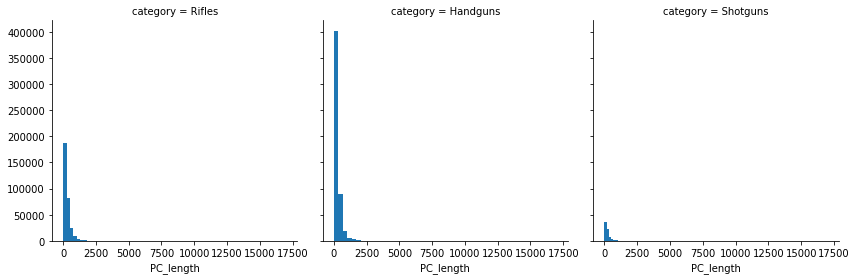

In [164]:
# Check word count difference on gun category


g = sns.FacetGrid(firearm_2019, col='category', height=4, aspect=1)

g = g.map(plt.hist, 'PC_length', bins=50)

Text(0, 0.5, 'Text Length')

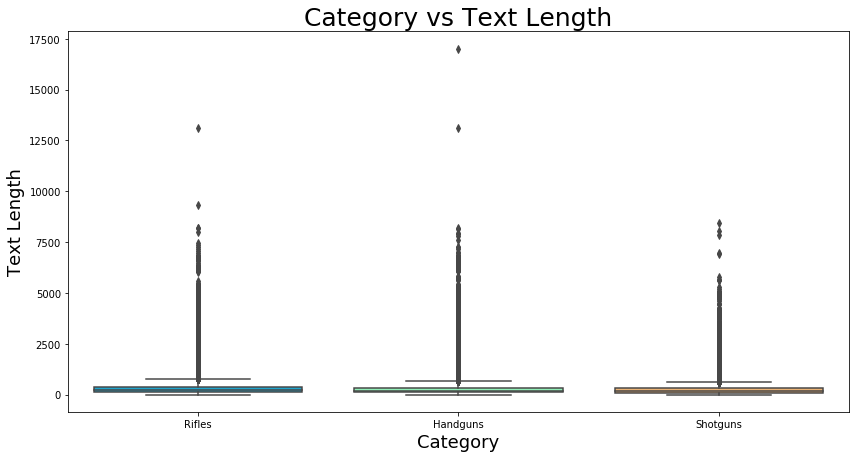

In [165]:

fig=plt.figure(figsize=(14,7))
ax=sns.boxplot(x='category', y='PC_length', data=firearm_2019, palette='rainbow')
plt.title('Category vs Text Length', fontsize=25)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Text Length',fontsize=18)

All word counts plot are similar. So, it is not significant.

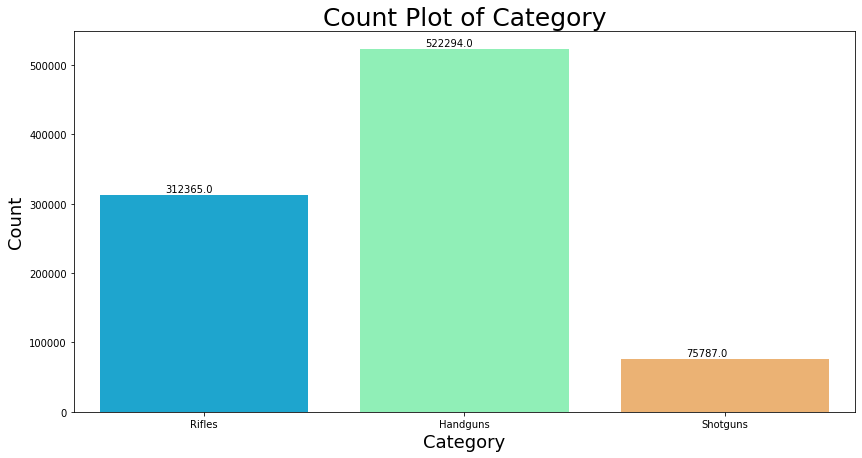

In [166]:
fig=plt.figure(figsize=(14,7))
ax=sns.countplot(x='category', data=firearm_2019, palette='rainbow')
plt.title('Count Plot of Category', fontsize=25)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Count',fontsize=18)
for p in ax.patches:
        ax.annotate('{:0.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5000))

In [167]:
# Create a list of lists containing lowercase words for each tweet
words_in_pc = [str(pc).lower().split() for pc in firearm_2019['post_content']]

In [168]:
words_in_pc

[['spikes',
  'tactical',
  'ar',
  'built',
  'with',
  'all',
  'spikes',
  'parts.',
  'fn',
  '16\x94',
  'chrome',
  'lines',
  'chf',
  'barrel,',
  'spikes',
  'bcg,',
  'spike',
  'upper',
  'and',
  'lower',
  'set,',
  'spikes',
  'lpk,',
  'spikes',
  'buffer,',
  'buffer',
  'tube,',
  'and',
  'spring',
  'set.',
  'mft',
  'grip,',
  'minimalist',
  'stock,',
  'and',
  'mft',
  'foreword',
  'grip.',
  'utg',
  '15\x94',
  'light',
  'weigh',
  'slim',
  'rail.',
  'precision',
  'armament',
  'muzzle',
  'brake',
  'and',
  'alg',
  'trigger.'],
 ['h&r',
  'model',
  '733',
  'up',
  'for',
  'sale',
  'or',
  'trade',
  'its',
  'a',
  '6',
  'shot',
  '32',
  'cal',
  'open',
  'to',
  'all',
  'trades'],
 ['flawless', 'with', 'crimson', 'trace', '$795'],
 ['complete',
  "knight's",
  'armament',
  'sr15',
  'e3',
  'upper',
  'receiver',
  'group',
  'on',
  'a',
  'yhm',
  'pre',
  '2016',
  'enforcement',
  'notice',
  'lower.',
  'cerekoted',
  'burnt',
  'bronze'

In [169]:
# List of all words across Post Content
all_words_pc = list(itertools.chain(*words_in_pc))

counts_pc = collections.Counter(all_words_pc)

# 20 Most Common Word
counts_pc.most_common(20)

[('and', 1171979),
 ('a', 993316),
 ('the', 898868),
 ('with', 837722),
 ('in', 685903),
 ('for', 634873),
 ('to', 627599),
 ('is', 564579),
 ('i', 409438),
 ('or', 399337),
 ('of', 391616),
 ('it', 326960),
 ('have', 315821),
 ('this', 276530),
 ('new', 247512),
 ('comes', 235494),
 ('has', 235112),
 ('will', 195615),
 ('no', 195446),
 ('on', 187928)]

### These words are frequency come out, but these words are meaningless. So, I will use Stopwords to filter out these words

# Remove Stopwords With nltk

In [170]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonlim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['has',
 'm',
 'under',
 'nor',
 'myself',
 'because',
 'in',
 'shouldn',
 'our',
 "you'd"]

In [171]:
# Remove stop words from each tweet list of words
pc_nsw = [[word for word in pc_words if not word in stop_words]
              for pc_words in words_in_pc]

In [172]:
# Check the words
pc_nsw[0]

['spikes',
 'tactical',
 'ar',
 'built',
 'spikes',
 'parts.',
 'fn',
 '16\x94',
 'chrome',
 'lines',
 'chf',
 'barrel,',
 'spikes',
 'bcg,',
 'spike',
 'upper',
 'lower',
 'set,',
 'spikes',
 'lpk,',
 'spikes',
 'buffer,',
 'buffer',
 'tube,',
 'spring',
 'set.',
 'mft',
 'grip,',
 'minimalist',
 'stock,',
 'mft',
 'foreword',
 'grip.',
 'utg',
 '15\x94',
 'light',
 'weigh',
 'slim',
 'rail.',
 'precision',
 'armament',
 'muzzle',
 'brake',
 'alg',
 'trigger.']

In [173]:
all_words_nsw = list(itertools.chain(*pc_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('new', 247512),
 ('comes', 235494),
 ('round', 154506),
 ('gun', 151682),
 ('2', 151556),
 ('trade', 146351),
 ('barrel', 144573),
 ('rounds', 141835),
 ('glock', 139038),
 ('original', 135663),
 ('box', 133684),
 ('factory', 123883),
 ('like', 121425),
 ('one', 119672),
 ('text', 119536)]

In [174]:
counts_nsw.most_common(30)

[('new', 247512),
 ('comes', 235494),
 ('round', 154506),
 ('gun', 151682),
 ('2', 151556),
 ('trade', 146351),
 ('barrel', 144573),
 ('rounds', 141835),
 ('glock', 139038),
 ('original', 135663),
 ('box', 133684),
 ('factory', 123883),
 ('like', 121425),
 ('one', 119672),
 ('text', 119536),
 ('rifle', 116969),
 ('looking', 114003),
 ('pistol', 109974),
 ('sale', 105086),
 ('-', 101944),
 ('3', 101630),
 ('mags', 100558),
 ('condition', 100074),
 ('also', 96800),
 ('great', 92677),
 ('cash', 91676),
 ('mag', 86125),
 ('9mm', 84037),
 ('model', 83618),
 ('it.', 80111)]

# Creating my own stopword
I want to remove some meaningless or unknown meaning word from the list such as 2, 3, &, -

In [175]:
collection_words = ['2','3','-', '&']

pc_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in pc_nsw]

In [176]:
# Flatten list of words in clean pc
all_words_nsw_nc = list(itertools.chain(*pc_nsw_nc))

# Create counter of words in clean pc
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('new', 247512),
 ('comes', 235494),
 ('round', 154506),
 ('gun', 151682),
 ('trade', 146351),
 ('barrel', 144573),
 ('rounds', 141835),
 ('glock', 139038),
 ('original', 135663),
 ('box', 133684),
 ('factory', 123883),
 ('like', 121425),
 ('one', 119672),
 ('text', 119536),
 ('rifle', 116969)]

In [177]:
counts_nsw_nc.most_common(25)

[('new', 247512),
 ('comes', 235494),
 ('round', 154506),
 ('gun', 151682),
 ('trade', 146351),
 ('barrel', 144573),
 ('rounds', 141835),
 ('glock', 139038),
 ('original', 135663),
 ('box', 133684),
 ('factory', 123883),
 ('like', 121425),
 ('one', 119672),
 ('text', 119536),
 ('rifle', 116969),
 ('looking', 114003),
 ('pistol', 109974),
 ('sale', 105086),
 ('mags', 100558),
 ('condition', 100074),
 ('also', 96800),
 ('great', 92677),
 ('cash', 91676),
 ('mag', 86125),
 ('9mm', 84037)]

In [178]:
pc_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
pc_ncw.head()

,words,count
0,new,247512
1,comes,235494
2,round,154506
3,gun,151682
4,trade,146351


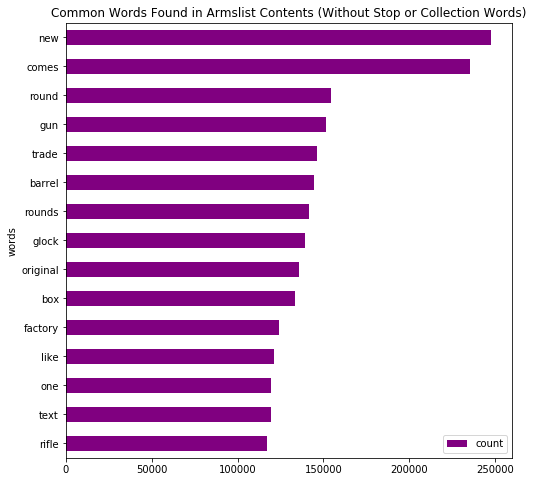

In [179]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pc_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Armslist Contents (Without Stop or Collection Words)")

plt.show()

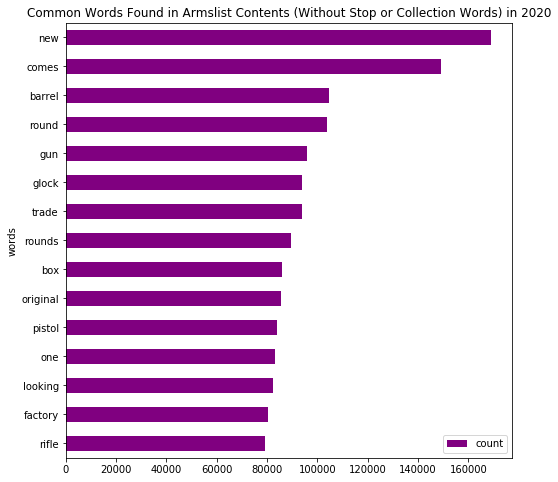

In [180]:
# For 2020



# Create a list of lists containing lowercase words for each tweet
words_in_pc = [str(pc).lower().split() for pc in firearm_2020['post_content']]

# Remove stop words from each tweet list of words
pc_nsw = [[word for word in pc_words if not word in stop_words]
              for pc_words in words_in_pc]

pc_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in pc_nsw]

# Flatten list of words in clean pc
all_words_nsw_nc = list(itertools.chain(*pc_nsw_nc))

# Create counter of words in clean pc
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

pc_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pc_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Armslist Contents (Without Stop or Collection Words) in 2020")

plt.show()

In [181]:
counts_nsw_nc.most_common(30)

[('new', 168999),
 ('comes', 149095),
 ('barrel', 104503),
 ('round', 103661),
 ('gun', 95930),
 ('glock', 93887),
 ('trade', 93718),
 ('rounds', 89585),
 ('box', 86065),
 ('original', 85366),
 ('pistol', 84000),
 ('one', 83164),
 ('looking', 82405),
 ('factory', 80479),
 ('rifle', 78991),
 ('like', 74059),
 ('text', 71548),
 ('sale', 64802),
 ('also', 63570),
 ('mags', 62389),
 ('condition', 61706),
 ('9mm', 61594),
 ('cash', 61383),
 ('model', 60750),
 ('mag', 55838),
 ('great', 53733),
 ('stock', 51714),
 ('trigger', 51405),
 ('sig', 50338),
 ('good', 49802)]

## Some word

1. Trade is always in the top list. 
2. Cash also frequently come out


## If there are differences between types of gun

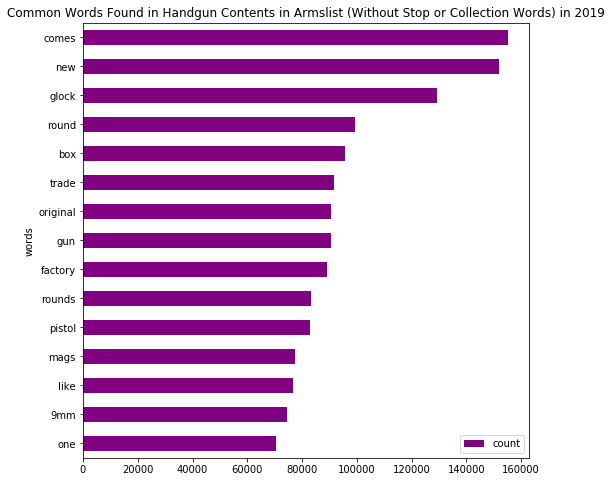

In [184]:
# Handgun

hg_df_2019 = firearm_2019[firearm_2019['category']=='Handguns']

# Create a list of lists containing lowercase words for each tweet
words_in_pc_hg = [str(pc).lower().split() for pc in hg_df_2019['post_content']]

# Remove stop words from each tweet list of words
pc_nsw_hg = [[word for word in pc_words if not word in stop_words]
              for pc_words in words_in_pc_hg]

pc_nsw_nc_hg = [[w for w in word if not w in collection_words]
                 for word in pc_nsw_hg]

# Flatten list of words in clean pc
all_words_nsw_nc_hg = list(itertools.chain(*pc_nsw_nc_hg))

# Create counter of words in clean pc
counts_nsw_nc_hg = collections.Counter(all_words_nsw_nc_hg)

pc_ncw_hg = pd.DataFrame(counts_nsw_nc_hg.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pc_ncw_hg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Handgun Contents in Armslist (Without Stop or Collection Words) in 2019")

plt.show()

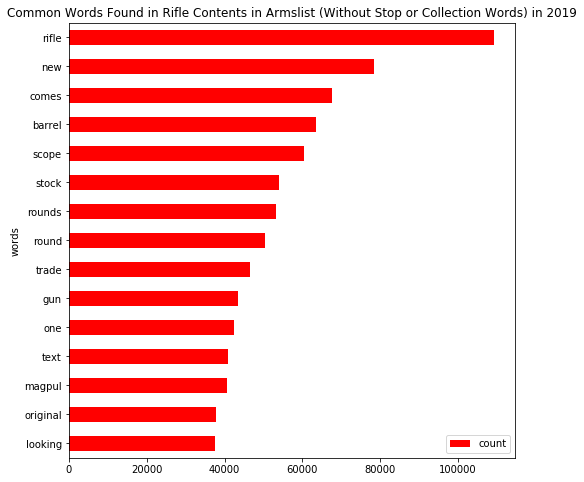

In [185]:
# rifle

rf_df_2019 = firearm_2019[firearm_2019['category']=='Rifles']

# Create a list of lists containing lowercase words for each tweet
words_in_pc_rf = [str(pc).lower().split() for pc in rf_df_2019['post_content']]

# Remove stop words from each tweet list of words
pc_nsw_rf = [[word for word in pc_words if not word in stop_words]
              for pc_words in words_in_pc_rf]

pc_nsw_nc_rf = [[w for w in word if not w in collection_words]
                 for word in pc_nsw_rf]

# Flatten list of words in clean pc
all_words_nsw_nc_rf = list(itertools.chain(*pc_nsw_nc_rf))

# Create counter of words in clean pc
counts_nsw_nc_rf = collections.Counter(all_words_nsw_nc_rf)

pc_ncw_rf = pd.DataFrame(counts_nsw_nc_rf.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pc_ncw_rf.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Rifle Contents in Armslist (Without Stop or Collection Words) in 2019")

plt.show()

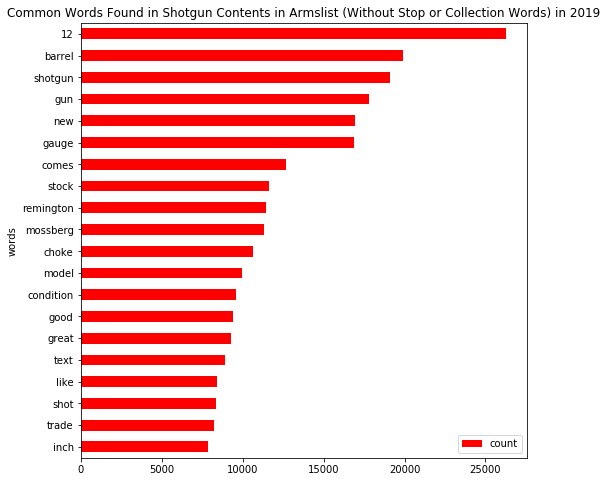

In [186]:
# Shotgun

sg_df_2019 = firearm_2019[firearm_2019['category']=='Shotguns']

# Create a list of lists containing lowercase words for each tweet
words_in_pc_sg = [str(pc).lower().split() for pc in sg_df_2019['post_content']]

# Remove stop words from each tweet list of words
pc_nsw_sg = [[word for word in pc_words if not word in stop_words]
              for pc_words in words_in_pc_sg]

pc_nsw_nc_sg = [[w for w in word if not w in collection_words]
                 for word in pc_nsw_sg]

# Flatten list of words in clean pc
all_words_nsw_nc_sg = list(itertools.chain(*pc_nsw_nc_sg))

# Create counter of words in clean pc
counts_nsw_nc_sg = collections.Counter(all_words_nsw_nc_sg)

pc_ncw_sg = pd.DataFrame(counts_nsw_nc_sg.most_common(20),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pc_ncw_sg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Shotgun Contents in Armslist (Without Stop or Collection Words) in 2019")

plt.show()